https://worldroadstatistics.org/wrs-data/data/

Area of analysis: is Ireland a country heavely dependent on public and shared transportation or not?

# Data Preparation & Visualisation Tasks 1-3

#### ●	Discuss in detail the process of acquiring your raw data, detailing the positive and/or negative aspects of your research and acquisition. This should include the relevance and implications of any and all licensing/permissions associated with the data. [0-15]

Process of Acquiring Raw Data:

Explain how you obtained the raw data for your research. Did you collect it yourself, or did you use existing datasets? Specify the sources and methods involved in acquiring the data.

Data has been researched first through the provided "transport infrastructure ireland" dataset website and the on the public internet.

Aften an intensive search of a comprehensive dataset that would contain standardized traffic and infrastructure information for multiple countries, data from https://worldroadstatistics.org/wrs-data/data/ was chosen.

The acquisition required a registration process that then led to the access of the datawarehouse. 

Positive Aspects:

Identify and elaborate on any positive aspects of the data acquisition process. For example, discuss the reliability of the data, the diversity of sources, or any unique features that make the data valuable for your research.

The main reason and positive aspect of why I decided to choose this dataset is because it is coming from a reliable datasource: The International Federation Road. This organization is a global, independent, not-for-profit organisation with headquarters in Geneva, Switzerland. Active since 1948, its mission is to promote the development of roads and road networks that enable access and sustainable mobility for all.

IRS provides, among different indicators, traffic data regarding 200+ countries.
The IRS portal works as hub for parnter countries that access the platform Data Input Portal and submit their own data. Data from 2016 to 2021 is provided for free.

Negative Aspects:

Discuss any challenges or drawbacks encountered during the data acquisition. This could include issues such as data inconsistencies, missing values, biases, or limitations in the dataset that may impact the quality of your research.

It happened that the data warehouse was offline, meaning that the access to data wasn't as simple as expected.
Few countries were presenting missing data.

Relevance of Data:

Explain why the acquired data is relevant to your research objectives. Discuss how it aligns with your research questions and contributes to the overall goals of your study.

The research I'm undertaking is aiming to answer the question: Is Ireland a country heavely dependent on public transportation or not?

Of course, to make an assesment on Ireland condition in regard to public transportation, a concrete way of comparing it with other countries is necessary. The found dataset provides the right measurable metrics to asses the usage of different kind of transportation methods.

Implications of Licensing/Permissions:

If applicable, detail any licensing agreements or permissions associated with the data. Discuss how these agreements impact your ability to use, analyze, and share the data. Consider the ethical implications of working with the data within the boundaries set by licensing agreements.

Overall Assessment:

Provide an overall assessment of the data acquisition process. Consider summarizing the strengths and weaknesses, and reflect on how the chosen data contributes to the validity and reliability of your research.

#### ●	Exploratory Data Analysis helps to identify patterns, inconsistencies, anomalies, missing data, and other attributes and issues in data sets so problems can be addressed. Evaluate your raw data and detail, in depth, the various attributes and issues that you find. Your evaluation should reference evidence to support your  chosen methodology and use visualizations to illustrate your findings.[0-25]

Data loading

In [2]:
import pandas as pd
import warnings

df_2021 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2021.csv")
df_2020 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2020.csv")
df_2019 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2019.csv")
df_2018 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2018.csv")
df_2017 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2017.csv")
df_2016 = pd.read_csv("../Data/total-four-wheeled-traffic-(by-vehicle-type)---2016.csv")

df_2021["Year"] = 2021 
df_2020["Year"] = 2020
df_2019["Year"] = 2019
df_2018["Year"] = 2018
df_2017["Year"] = 2017
df_2016["Year"] = 2016

df = pd.concat([df_2021,df_2020,df_2019,df_2018,df_2017,df_2016])

# Quickly show the dataset
df.head()

,Category,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic",Total four wheeled Traffic,Year
0,Austria,60721.0,390.0,13810.0,74921.0,2021
1,Belarus,244.0,324.0,935.0,1503.0,2021
2,Bulgaria,NaN,353.0,2757.0,3110.0,2021
3,Croatia,19780.0,240.0,3170.0,23190.0,2021
4,Denmark,40313.0,624.0,9257.0,50194.0,2021


Presented value are representing the traffic volume, either for specific vehicle categories or for all vehicles.
Traffic volume is defined by IRS as:
- Weighted average daily flow of each vehicle type on each category of the road network, as determined from regular national stratified, classified traffic counts.

If no data is availble, then an estimation is calculated:
- If counts are not available, traffic volume is estimated by dividing the annual consumption of motor vehicle fuel (in litres) used in the country by the number of vehicles in each category. The result is then multiplied by the average number of km/litre for that category.

It's also worth giving a definition of the vehicle types here represented:
- Passenger cars are road motor vehicle, other than a motor cycle, intended for the carriage of passengers and designed to seat no more than nine persons (including the driver). Passenger cars include microcars (needing no permit to be driven), taxis, vans designed for transport of passengers and passenger hire cars, provided that they have fewer than ten seats.
- Buses and motor coaches are road motor vehicles designed to seat more than nine persons (including the driver). Included are mini-buses and mini-coaches designed to seat more than nine persons (including the driver).
- Vans & Pick-ups (Light goods road vehicle) are road vehicles with a gross vehicle weight of not more than 3500 kg, designed, exclusively or primarily, to carry goods, e.g. vans and pick-ups.
- Total four wheeled Traffic is just the sum of the preiovus.




https://worldroadstatistics.org/wp-content/uploads/2020/08/WRS-Definitions.pdf

In [3]:
# We aim at understanding the datatypes of available columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Category                                           188 non-null    object 
 1   Passenger Car Traffic                              152 non-null    float64
 2   Bus and Motor Coach Traffic                        176 non-null    float64
 3   Total Van, Pickup, Lorry and Road Tractor Traffic  175 non-null    float64
 4   Total four wheeled Traffic                         158 non-null    float64
 5   Year                                               188 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 10.3+ KB


In [4]:
# We aim at having a statistical description of our dataset
df.describe()

,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic",Total four wheeled Traffic,Year
count,152.000000,176.000000,175.000000,158.000000,188.000000
mean,93395.019737,879.346591,19094.211429,110578.993671,2018.500000
std,156635.457716,1141.624426,31317.093342,186865.921966,1.710302
min,29.000000,3.000000,4.000000,59.000000,2016.000000
25%,9396.000000,169.500000,2484.500000,11277.500000,2017.000000
50%,34973.500000,415.500000,7248.000000,44376.500000,2018.500000
75%,70646.000000,844.000000,16646.000000,83172.250000,2020.000000
max,649600.000000,4600.000000,122489.000000,751400.000000,2021.000000


In [5]:
# Let's get the shape of the dataset
df.shape

(188, 6)

In [6]:
# And check if there is any null value
df.isnull().sum()

Category                                              0
Passenger Car Traffic                                36
Bus and Motor Coach Traffic                          12
Total Van, Pickup, Lorry and Road Tractor Traffic    13
Total four wheeled Traffic                           30
Year                                                  0
dtype: int64

In [7]:
# Let's get the countries represented in the dataset
sorted(df["Category"].unique())

['Austria',
 'Belarus',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Hungary',
 'Ireland',
 'Latvia',
 'Lithuania',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Serbia',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom']

Show the values of each feature over time and by country.
This also shows if there are easely visible outliers and if there are missing data for specific feature, country and year.

In [8]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='feature-selector',
        options=[{'label': col, 'value': col} for col in df.columns[1:-1]],
        value='Total four wheeled Traffic',
        multi=False,
        style={'width': '50%'}
    ),
    dcc.Graph(id='traffic-bar-chart')
])

# Define callback to update the bar chart based on dropdown selection
@app.callback(
    Output('traffic-bar-chart', 'figure'),
    [Input('feature-selector', 'value')]
)
def update_bar_chart(selected_feature):
    df_grouped = df.groupby(["Category", "Year"]).sum().reset_index()
    fig = px.bar(df_grouped, x='Year', y=selected_feature, animation_frame='Category',
                 title=f'{selected_feature} by Year Over Categories')
    fig.update_layout(xaxis_title='Year', yaxis_title=selected_feature)
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

This graph shows outliers if we take into consideration only features.
This means that an outlier can be a single country for a specific year.

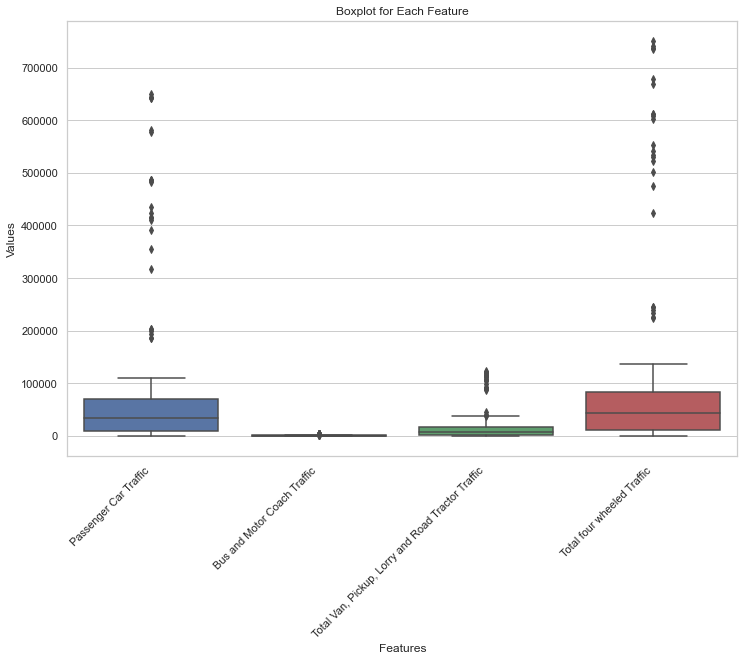

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.set(style="whitegrid")  # Set the style of the visualization

# Selecting the relevant columns for boxplot
boxplot_data = df.drop(columns=['Category', 'Year'])

# Create a boxplot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot_data))
plt.title("Boxplot for Each Feature")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

From previous graph,  given that the features are not scaled for different countries, it is normal to see many outliers.
Let's see if we can spot outliers just looking at a single country given that we have data from 2016 to 2021.

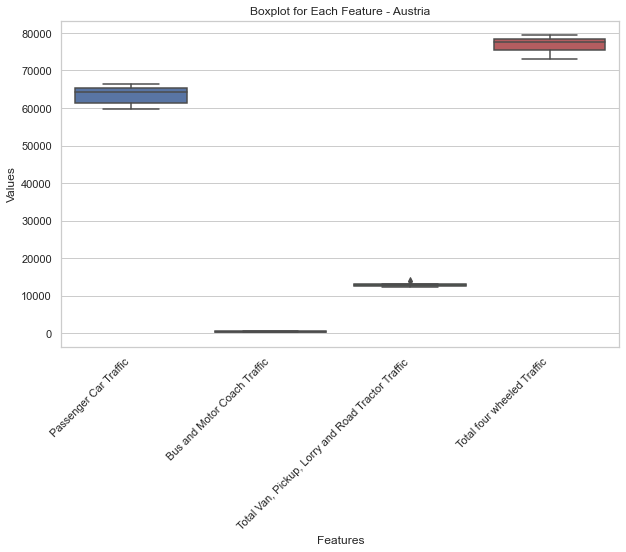

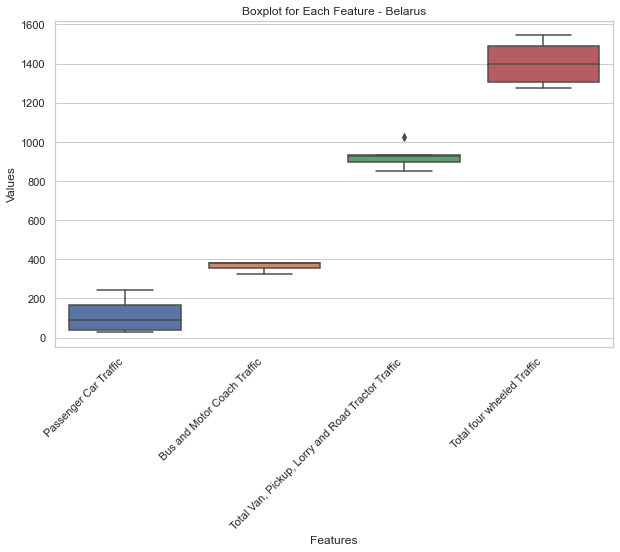

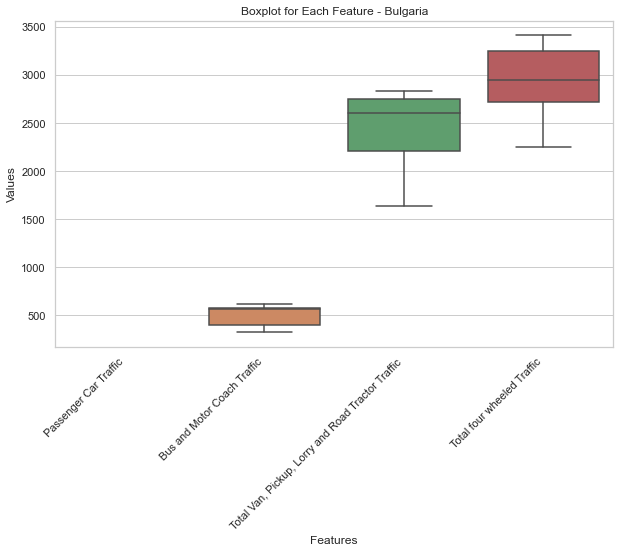

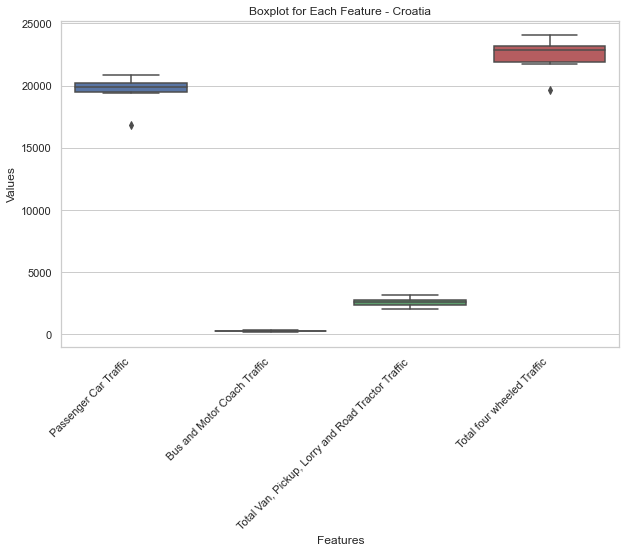

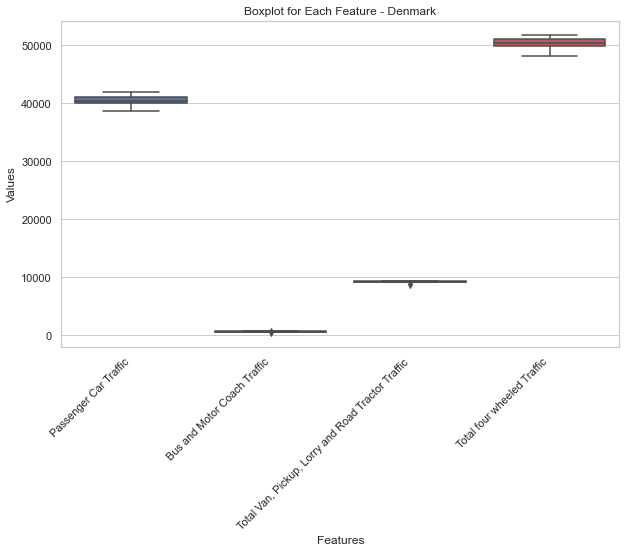

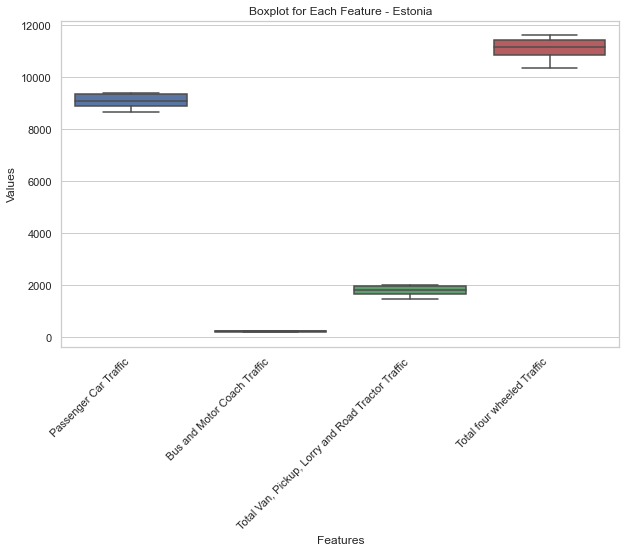

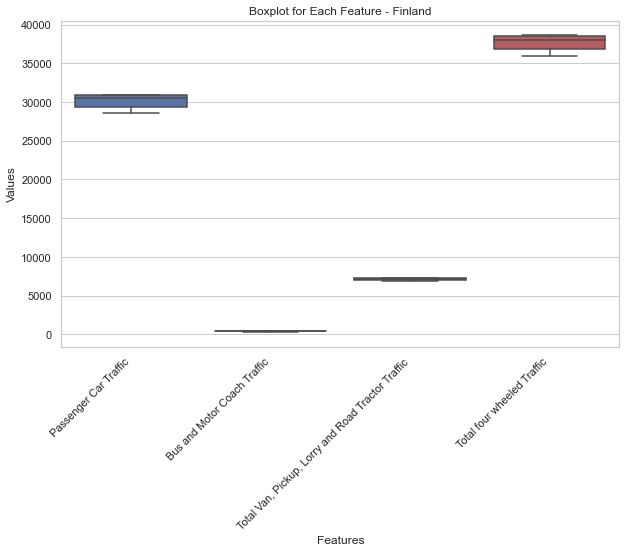

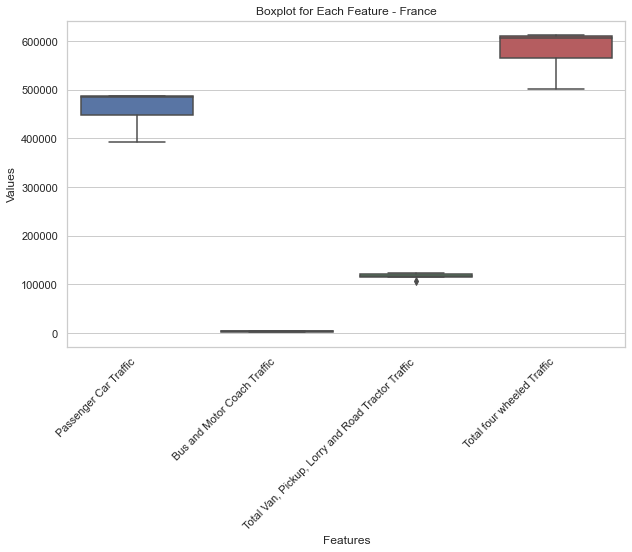

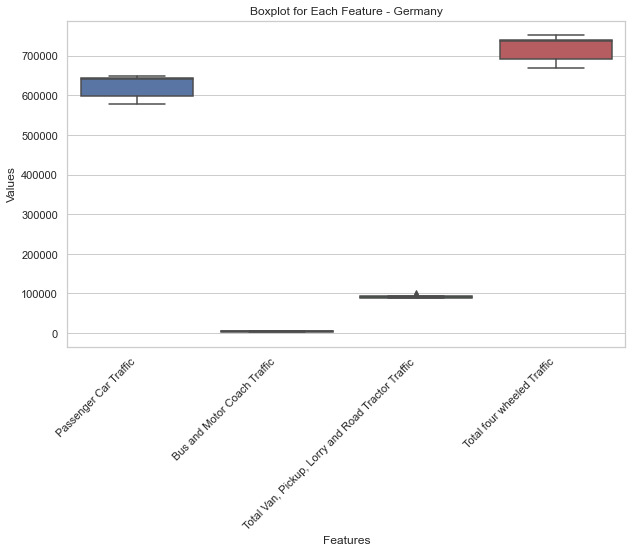

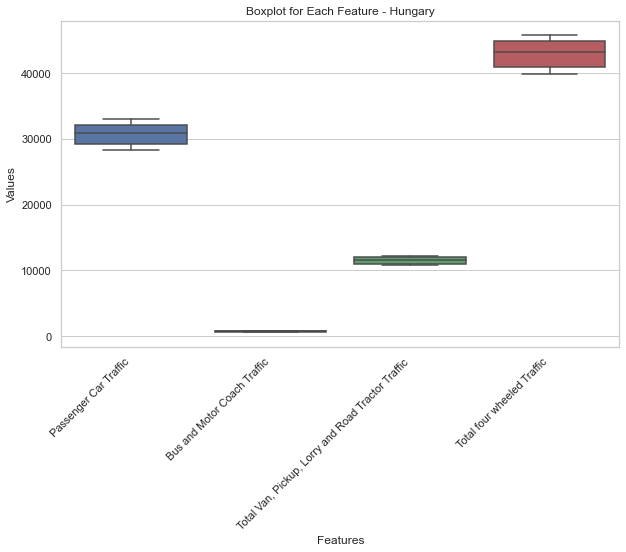

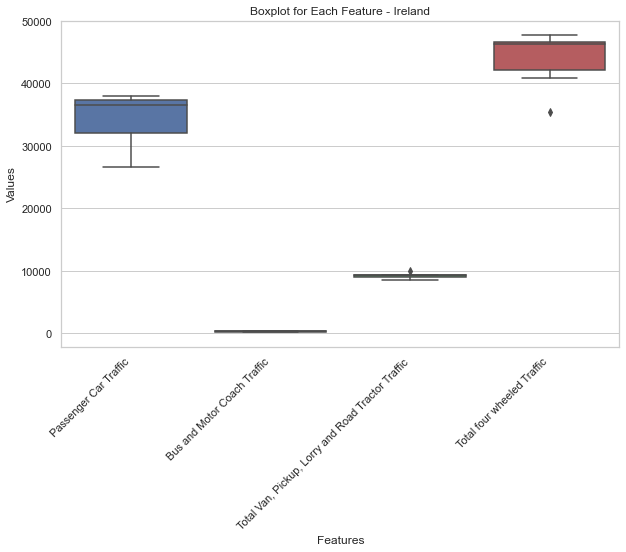

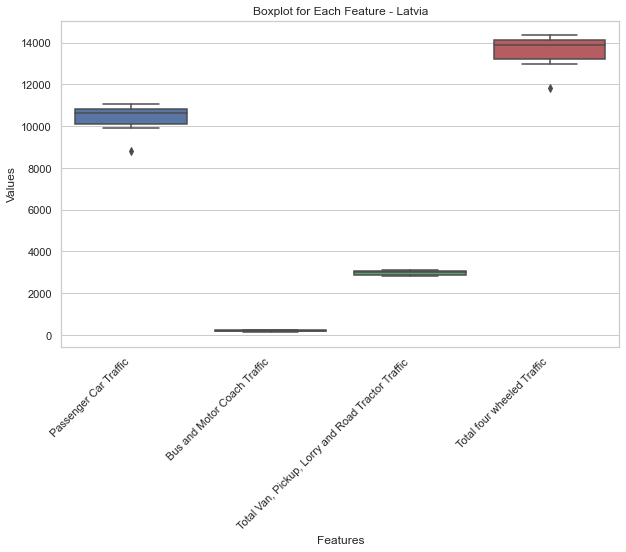

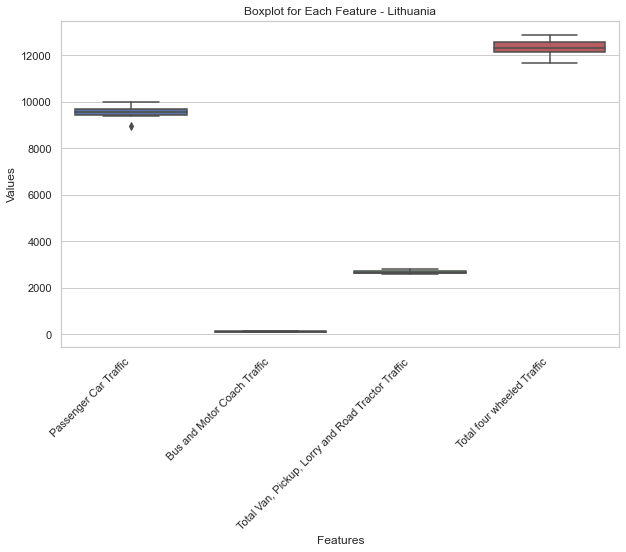

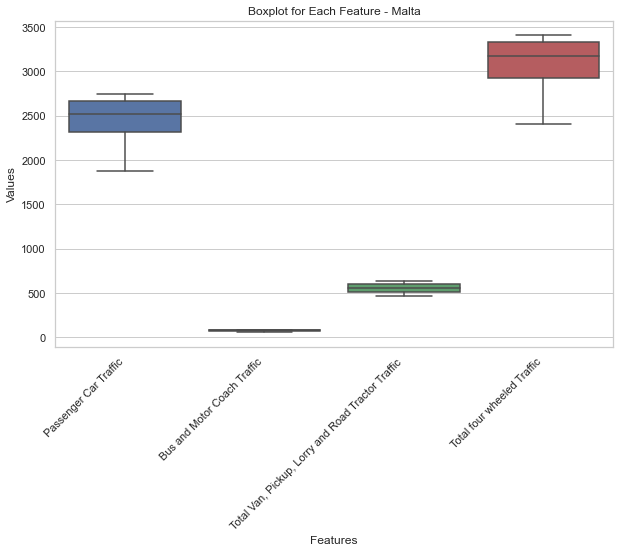

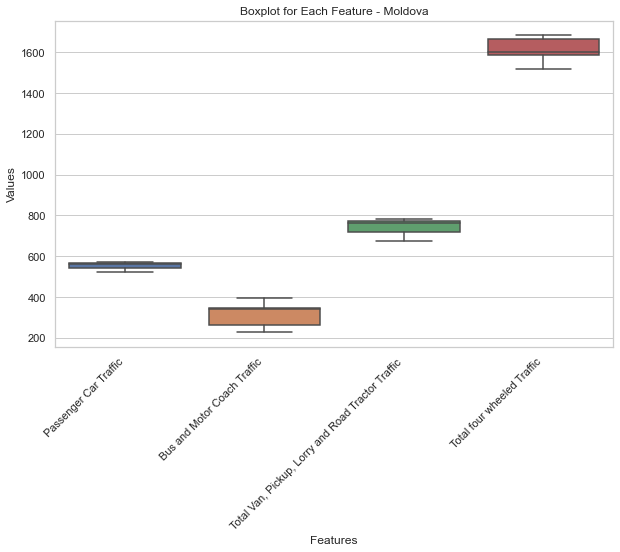

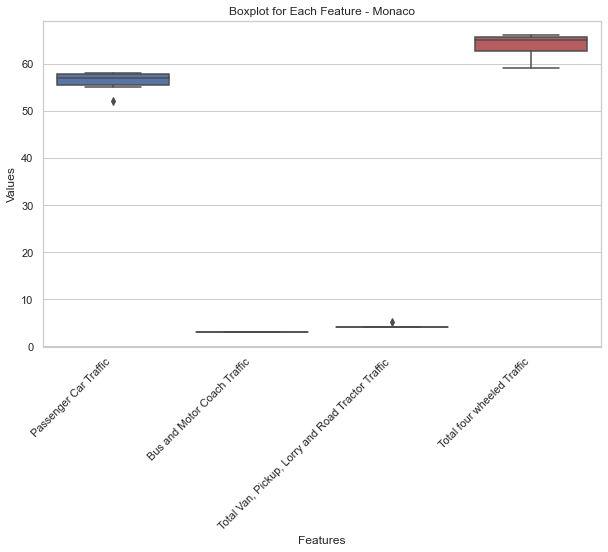

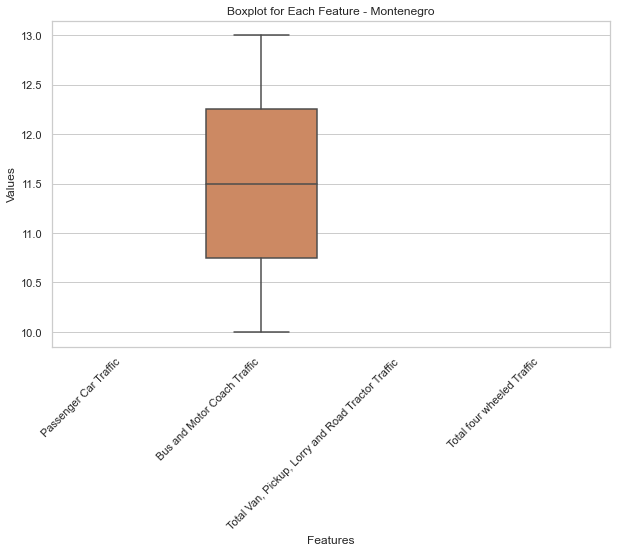

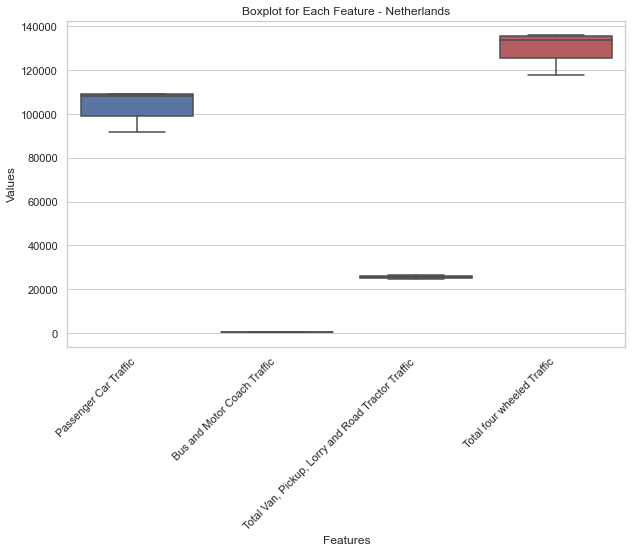

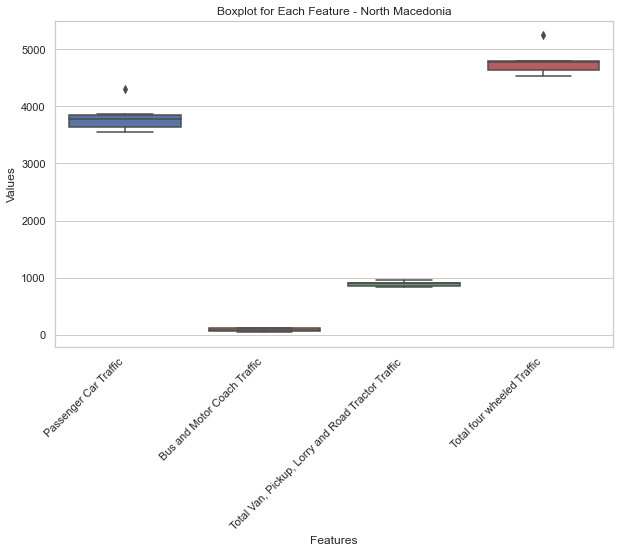

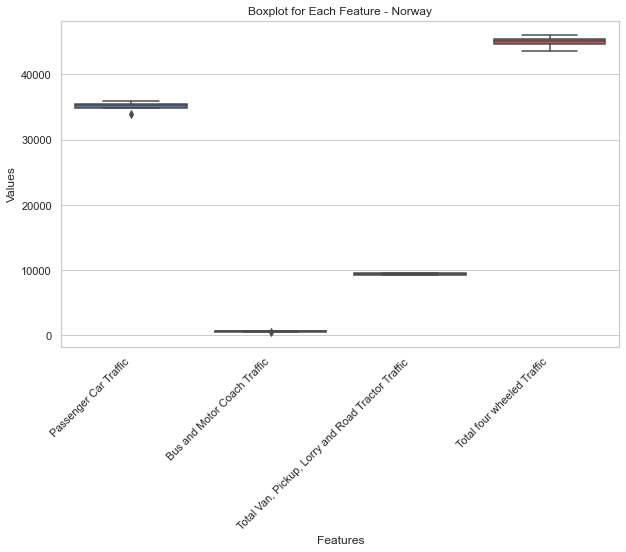

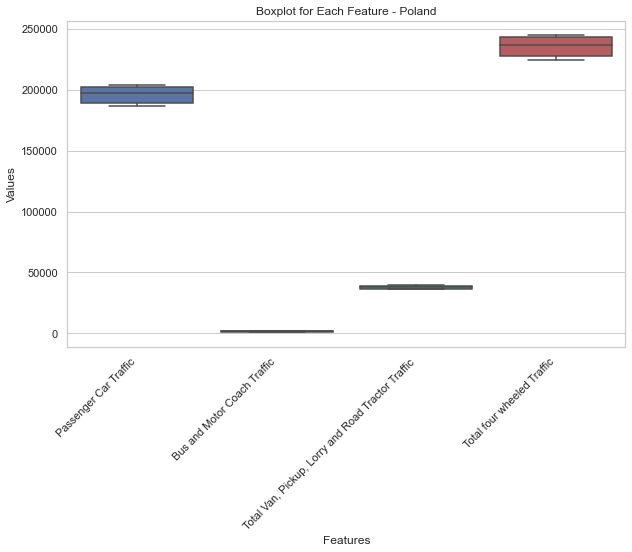

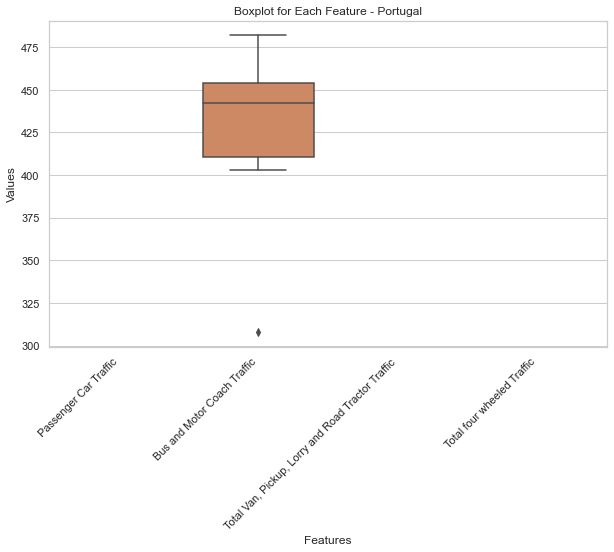

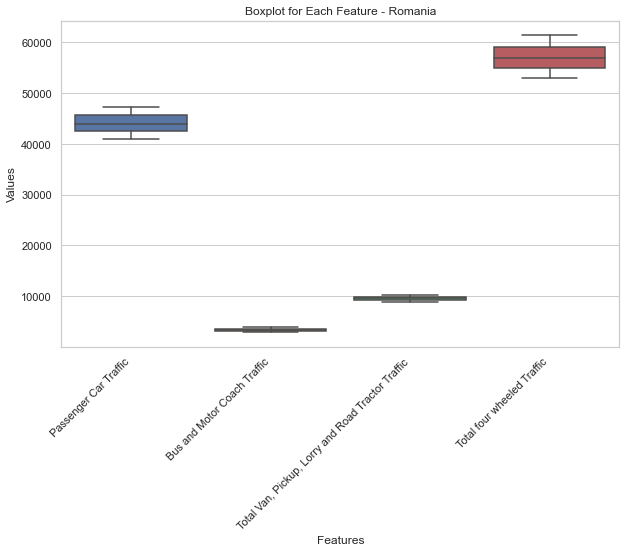

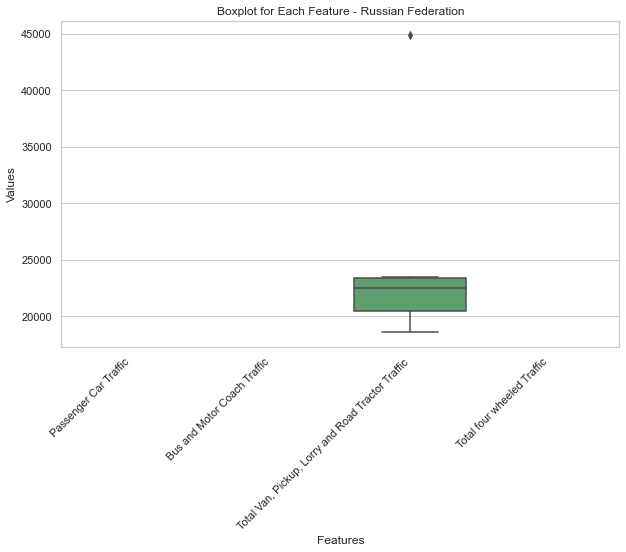

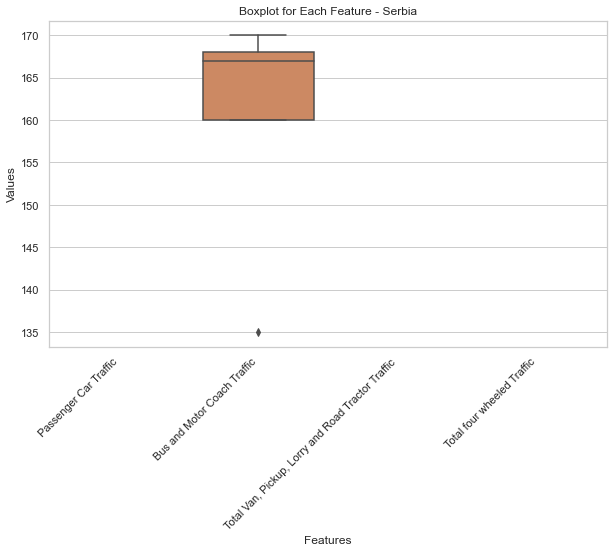

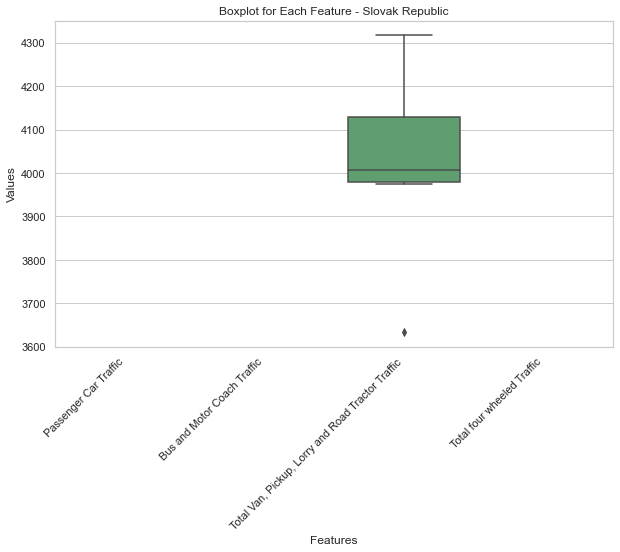

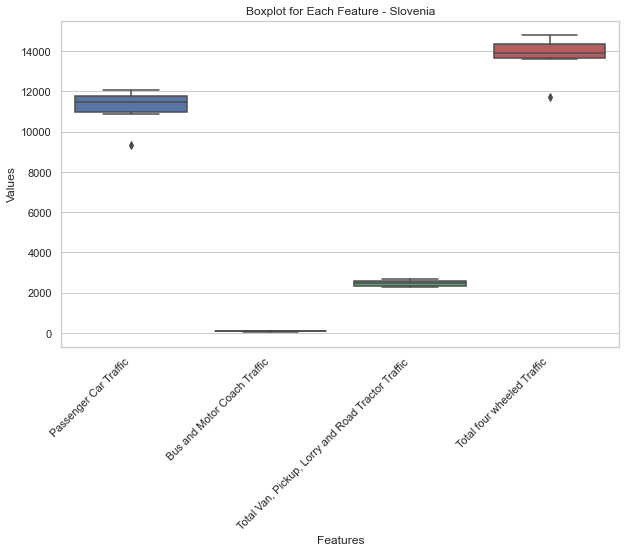

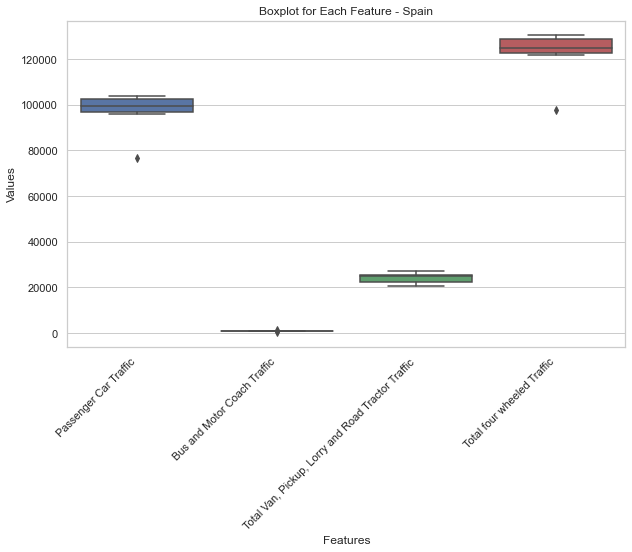

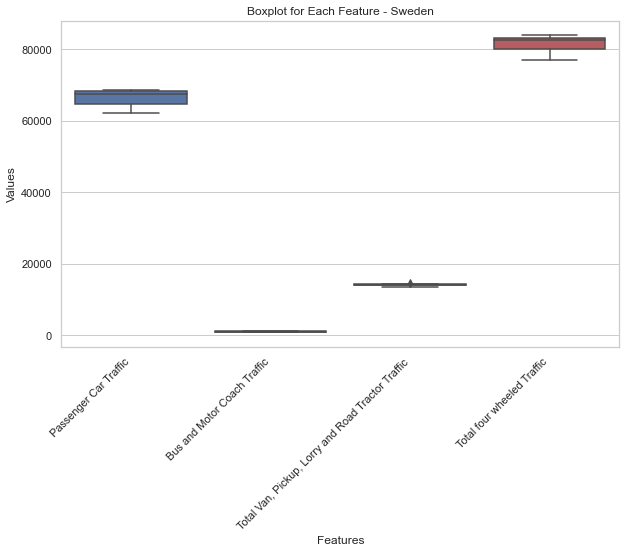

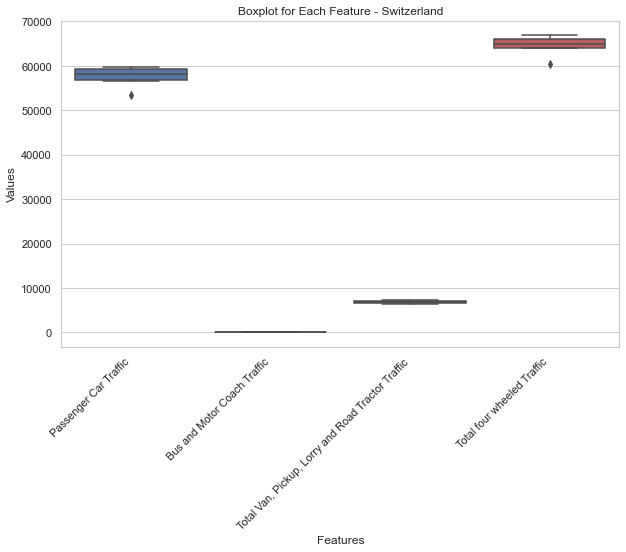

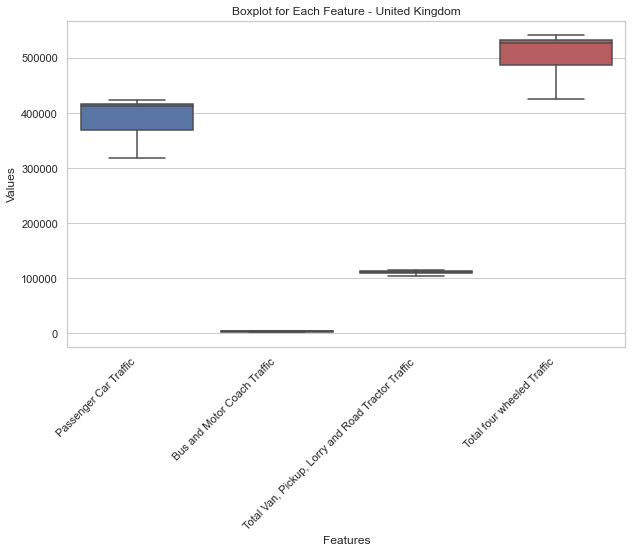

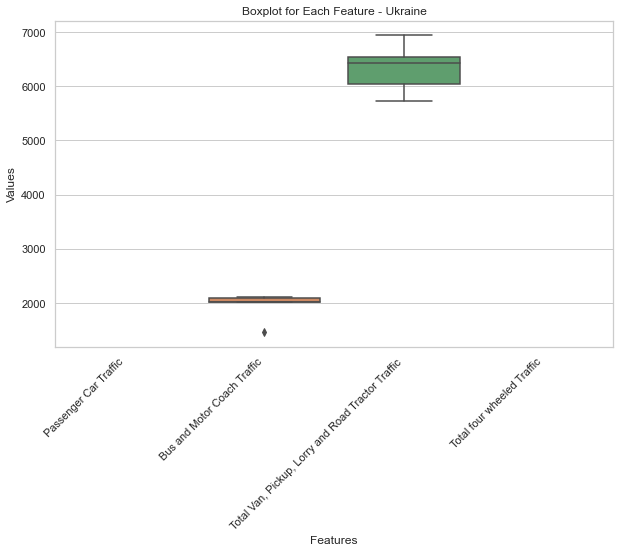

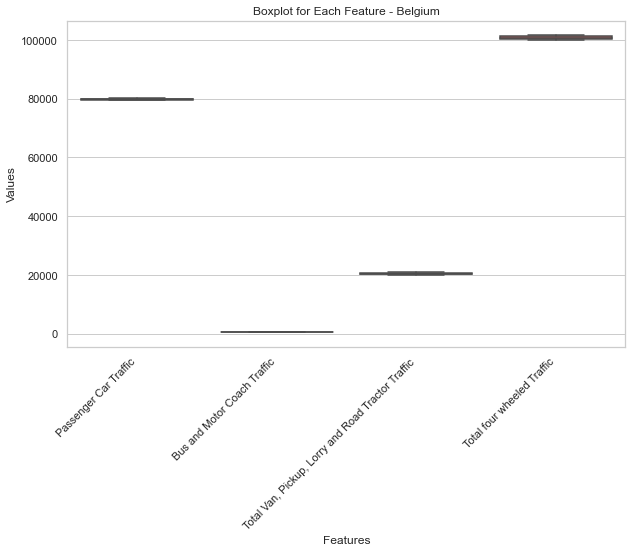

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.set(style="whitegrid")  # Set the style of the visualization

# Selecting the relevant columns for boxplot
boxplot_data = df.iloc[:,:-1]

# Get unique categories
categories = df['Category'].unique()

# Create a separate boxplot for each category
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="variable", y="value", data=pd.melt(boxplot_data[boxplot_data["Category"] == category].iloc[:,1:]))
    plt.title(f"Boxplot for Each Feature - {category}")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

Many countries do present outliers and, in the following section, we decide how to handle them.

#### ●	Taking into consideration the tasks required in the machine learning section, use appropriate data cleaning, engineering, extraction and/or other techniques to structure and enrich your data. Rationalize your decisions and implementation, including evidence of how your process has addressed the problems identified in the EDA (Exploratory Data Analysis) stage and how your structured data will assist in the analysis stage. This should include visualizations to illustrate your work and evidence to support your methodology.[0-30]

From previous analysis we realized there are multiple things we need to work on:
- Weighting of features
- Handling of missing data

Let's work on the features weighting and let's do a quick head of the dataframe to better explain the importance of this point:

In [11]:
df.head()

,Category,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic",Total four wheeled Traffic,Year
0,Austria,60721.0,390.0,13810.0,74921.0,2021
1,Belarus,244.0,324.0,935.0,1503.0,2021
2,Bulgaria,NaN,353.0,2757.0,3110.0,2021
3,Croatia,19780.0,240.0,3170.0,23190.0,2021
4,Denmark,40313.0,624.0,9257.0,50194.0,2021


If we look at data for Austria and Belarus in 2021, we can clearly see that the "Total four wheeled Traffic" is about 50 times bigger in Austria. This might be because of different reasons such as:
- Population size is different
- In one of the countries traffic data is not well represented with respect to the total population
- The development of a country may influence its vehicle traffic

For this reason, for our analysis, we want to consider the traffic % of vehicle categories with respect to the total four wheeled traffic of the specific country.

For this, the first thing we want to make sure is that the traffic sum of different vehicles type is equal to the four wheeled total:

In [12]:
df['Sum four wheeled Traffic'] = df['Passenger Car Traffic'] + df['Bus and Motor Coach Traffic'] + df['Total Van, Pickup, Lorry and Road Tractor Traffic']

# Check if the sum in the new column is equal to the values in column 4
df['Sum Check'] = df['Sum four wheeled Traffic'] == df['Total four wheeled Traffic']

# Display the rows where the sum is not equal to column 4
rows_with_mismatch = df[df['Sum Check'] == False]

Let's look at samples where we can see this miss match:

In [13]:
rows_with_mismatch

,Category,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic",Total four wheeled Traffic,Year,Sum four wheeled Traffic,Sum Check
2,Bulgaria,NaN,353.0,2757.0,3110.0,2021,NaN,False
8,Germany,582400.0,2900.0,92600.0,677800.0,2021,677900.0,False
13,Malta,2290.0,59.0,502.0,2852.0,2021,2851.0,False
16,Montenegro,NaN,13.0,NaN,NaN,2021,NaN,False
21,Portugal,NaN,403.0,NaN,NaN,2021,NaN,False
...,...,...,...,...,...,...,...,...
19,Norway,34849.0,569.0,9208.0,44625.0,2016,44626.0,False
21,Portugal,NaN,451.0,NaN,NaN,2016,NaN,False
23,Russian Federation,NaN,NaN,44837.0,NaN,2016,NaN,False
24,Slovak Republic,NaN,NaN,4017.0,NaN,2016,NaN,False


We can immediatelly observ that in some case the False flag is caused by the presence of NaN values.

Let's replace those NaN values and repeat the calculation:

In [14]:
rows_with_mismatch.fillna(0, inplace=True)

# Reset the index to avoid duplicate labels
rows_with_mismatch.reset_index(drop=True, inplace=True)

rows_with_mismatch['Sum four wheeled Traffic'] = (
    rows_with_mismatch['Passenger Car Traffic'] +
    rows_with_mismatch['Bus and Motor Coach Traffic'] +
    rows_with_mismatch['Total Van, Pickup, Lorry and Road Tractor Traffic']
)

# Check if the sum in the new column is equal to the values in column 4
rows_with_mismatch['Sum Check'] = rows_with_mismatch['Sum four wheeled Traffic'] == rows_with_mismatch['Total four wheeled Traffic']

# Display the rows where the sum is not equal to column 4
rows_with_mismatch = rows_with_mismatch[rows_with_mismatch['Sum Check'] == False]


C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\1544596826.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\1544596826.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\1544596826.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [15]:
rows_with_mismatch

,Category,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic",Total four wheeled Traffic,Year,Sum four wheeled Traffic,Sum Check
1,Germany,582400.0,2900.0,92600.0,677800.0,2021,677900.0,False
2,Malta,2290.0,59.0,502.0,2852.0,2021,2851.0,False
3,Montenegro,0.0,13.0,0.0,0.0,2021,13.0,False
4,Portugal,0.0,403.0,0.0,0.0,2021,403.0,False
5,Romania,47249.0,3862.0,10242.0,61354.0,2021,61353.0,False
...,...,...,...,...,...,...,...,...
64,Norway,34849.0,569.0,9208.0,44625.0,2016,44626.0,False
65,Portugal,0.0,451.0,0.0,0.0,2016,451.0,False
66,Russian Federation,0.0,0.0,44837.0,0.0,2016,44837.0,False
67,Slovak Republic,0.0,0.0,4017.0,0.0,2016,4017.0,False


With this operation we can clearly see that we reduced the samples from 69 to 63.

Given that numbers might be rounded, let's remove all samples where the difference between the already available sum and the calculated one is less than 1%:

In [16]:
# Set the percentage threshold
percentage_threshold = 1

# Calculate the absolute difference and percentage difference using .loc
rows_with_mismatch.loc[:, 'Absolute_Difference'] = rows_with_mismatch['Sum four wheeled Traffic'] - rows_with_mismatch['Total four wheeled Traffic']
rows_with_mismatch.loc[:, 'Percentage_Difference'] = (rows_with_mismatch['Absolute_Difference'] / rows_with_mismatch['Total four wheeled Traffic']) * 100

# Filter rows where the percentage difference is greater than or equal to the threshold using .loc
rows_with_mismatch = rows_with_mismatch.loc[rows_with_mismatch['Percentage_Difference'] >= percentage_threshold]

# Drop the additional columns used for calculations using .loc
rows_with_mismatch = rows_with_mismatch.drop(['Absolute_Difference', 'Percentage_Difference'], axis=1)

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\685572856.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\685572856.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
rows_with_mismatch

,Category,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic",Total four wheeled Traffic,Year,Sum four wheeled Traffic,Sum Check
3,Montenegro,0.0,13.0,0.0,0.0,2021,13.0,False
4,Portugal,0.0,403.0,0.0,0.0,2021,403.0,False
6,Russian Federation,0.0,0.0,23280.0,0.0,2021,23280.0,False
7,Serbia,0.0,135.0,0.0,0.0,2021,135.0,False
8,Slovak Republic,0.0,0.0,3634.0,0.0,2021,3634.0,False
15,Montenegro,0.0,10.0,0.0,0.0,2020,10.0,False
17,Portugal,0.0,308.0,0.0,0.0,2020,308.0,False
18,Russian Federation,0.0,0.0,23444.0,0.0,2020,23444.0,False
19,Serbia,0.0,167.0,0.0,0.0,2020,167.0,False
20,Slovak Republic,0.0,0.0,3974.0,0.0,2020,3974.0,False


In [18]:
rows_with_mismatch.shape

(30, 8)

We can now see that we are left with only with samples where "Total four wheeled Traffic" had originally a nan value. We thus want to make sure that first of all those samples are deleted from our dataframe:

In [19]:
df.dropna(subset=['Total four wheeled Traffic'], inplace=True)

In [20]:
df.shape

(158, 8)

We can see that the dataset is now dropped from 188 to 158, exactly 30 samples.

Let's now see how many other samples are left with null values:

In [21]:
df[df.isnull().any(axis=1)]

,Category,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic",Total four wheeled Traffic,Year,Sum four wheeled Traffic,Sum Check
2,Bulgaria,NaN,353.0,2757.0,3110.0,2021,NaN,False
2,Bulgaria,NaN,329.0,2458.0,2787.0,2020,NaN,False
2,Bulgaria,NaN,614.0,1638.0,2252.0,2019,NaN,False
2,Bulgaria,NaN,574.0,2121.0,2695.0,2018,NaN,False
3,Bulgaria,NaN,560.0,2739.0,3299.0,2017,NaN,False
3,Bulgaria,NaN,578.0,2831.0,3409.0,2016,NaN,False


As Bulgaria is the only country with NaN values, we decide to drop it:

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(152, 8)

Now, for the traffic by vehicle type column, we can get the % value with respect to the total traffic:

In [24]:
for i in df.iloc[:, 1:-4].columns:
    df[i] = (df[i]/df["Total four wheeled Traffic"])*100

Now that we have the % values, we can remove the following columns:
- Total four wheeled Traffic
- Sum four wheeled Traffic
- Sum Check

In [25]:
columns_to_delete = ['Total four wheeled Traffic', 'Sum four wheeled Traffic', 'Sum Check']

# Delete specified columns using del
for column in columns_to_delete:
    del df[column]

If we remember, we also had countries missing values for some years. Let's identify them and fill the values:

In [26]:
from itertools import product

all_categories = df['Category'].unique()
all_years = range(2016, 2022)
ref_df = pd.DataFrame(list(product(all_categories, all_years)), columns=['Category', 'Year'])

# Merge the reference DataFrame with the original DataFrame
ref_df = pd.merge(ref_df, df, on=['Category', 'Year'], how='left')

# Calculate the mean for each category
category_means = ref_df.groupby('Category').transform('mean')

# Fill missing values with the corresponding mean for each category
ref_df.fillna(category_means, inplace=True)

df = ref_df

Let's now visualize graph we used in EDA:

In [27]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='feature-selector',
        options=[{'label': col, 'value': col} for col in df.columns[2:]],
        value='Bus and Motor Coach Traffic',
        multi=False,
        style={'width': '50%'}
    ),
    dcc.Graph(id='traffic-bar-chart')
])

# Define callback to update the bar chart based on dropdown selection
@app.callback(
    Output('traffic-bar-chart', 'figure'),
    [Input('feature-selector', 'value')]
)
def update_bar_chart(selected_feature):
    df_grouped = df.groupby(["Category", "Year"]).sum().reset_index()
    fig = px.bar(df_grouped, x='Year', y=selected_feature, animation_frame='Category',
                 title=f'{selected_feature} by Year Over Categories')
    fig.update_layout(xaxis_title='Year', yaxis_title=selected_feature)
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

We have now resolved the problem of missing data, now we need to solve the outliers problem.

Let's first of all see if the situation has been improved so far:

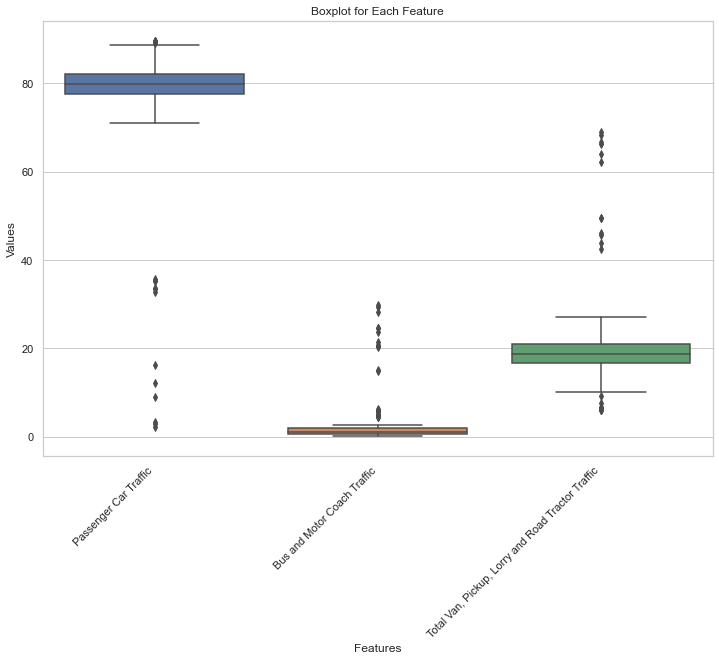

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.set(style="whitegrid")  # Set the style of the visualization

# Selecting the relevant columns for boxplot
boxplot_data = df.drop(columns=['Category', 'Year'])

# Create a boxplot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot_data))
plt.title("Boxplot for Each Feature")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

If we look at the boxplot for each feature we see very different results after the feature transformation made so far. Let's see the same for the single countries: 

In [29]:
df

,Category,Year,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic"
0,Austria,2016,83.652140,0.619617,15.728243
1,Austria,2017,83.591761,0.624007,15.784232
2,Austria,2018,83.096423,0.601927,16.301651
3,Austria,2019,82.437615,0.606359,16.956026
4,Austria,2020,81.747229,0.521233,17.732909
...,...,...,...,...,...
151,Belgium,2017,78.861532,0.604688,20.532795
152,Belgium,2018,79.103826,0.609194,20.286488
153,Belgium,2019,79.103826,0.609194,20.286488
154,Belgium,2020,79.103826,0.609194,20.286488


In [30]:
df.drop("Year", axis=1)

,Category,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic"
0,Austria,83.652140,0.619617,15.728243
1,Austria,83.591761,0.624007,15.784232
2,Austria,83.096423,0.601927,16.301651
3,Austria,82.437615,0.606359,16.956026
4,Austria,81.747229,0.521233,17.732909
...,...,...,...,...
151,Belgium,78.861532,0.604688,20.532795
152,Belgium,79.103826,0.609194,20.286488
153,Belgium,79.103826,0.609194,20.286488
154,Belgium,79.103826,0.609194,20.286488


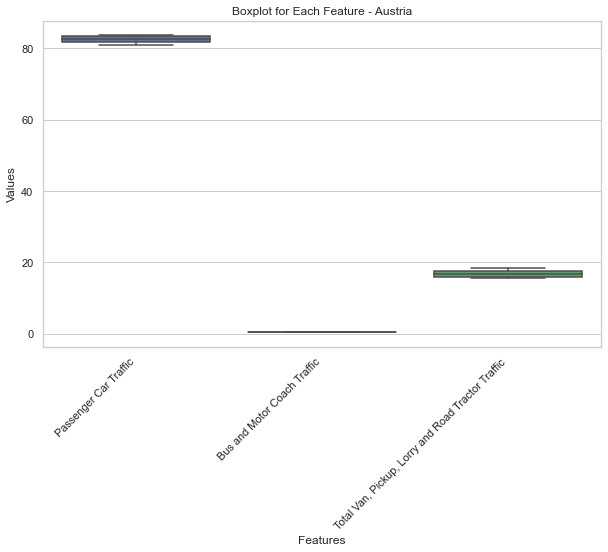

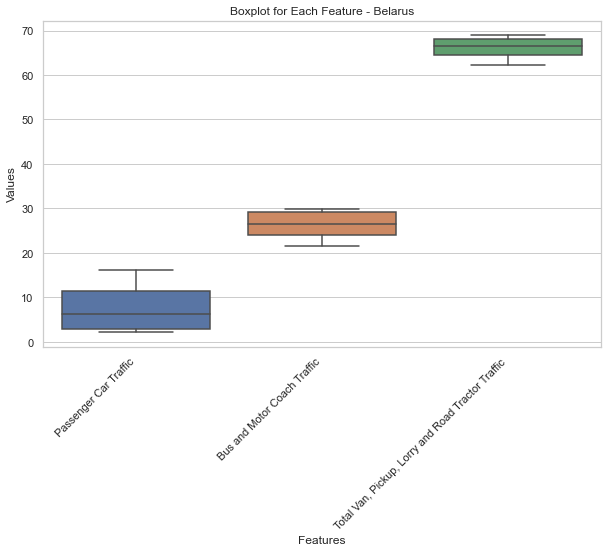

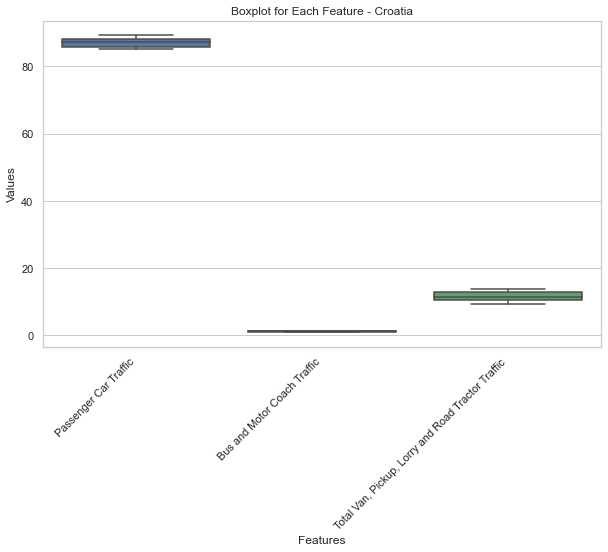

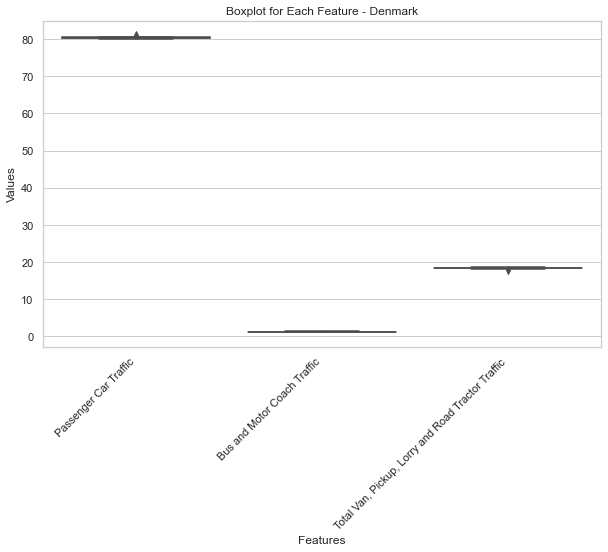

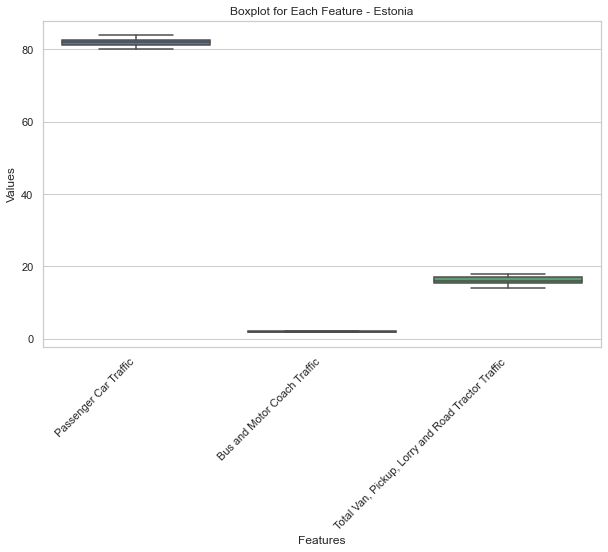

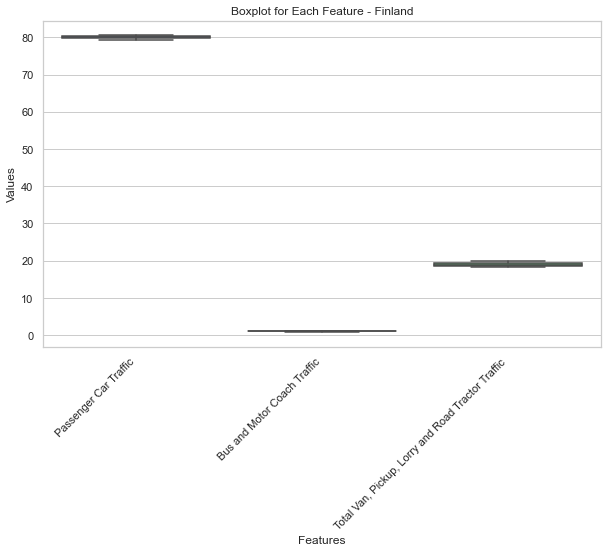

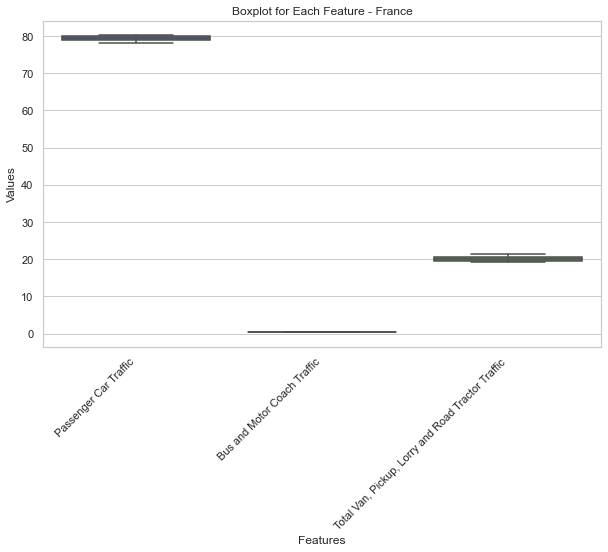

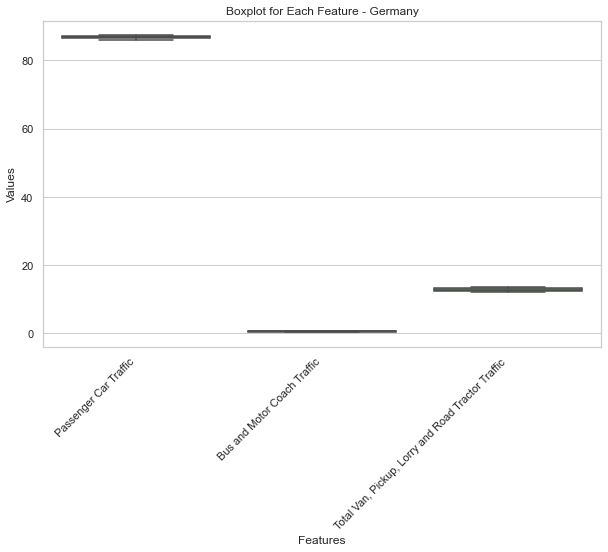

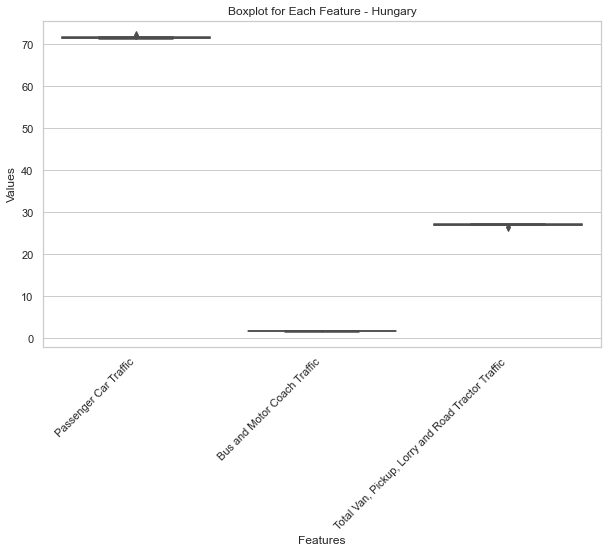

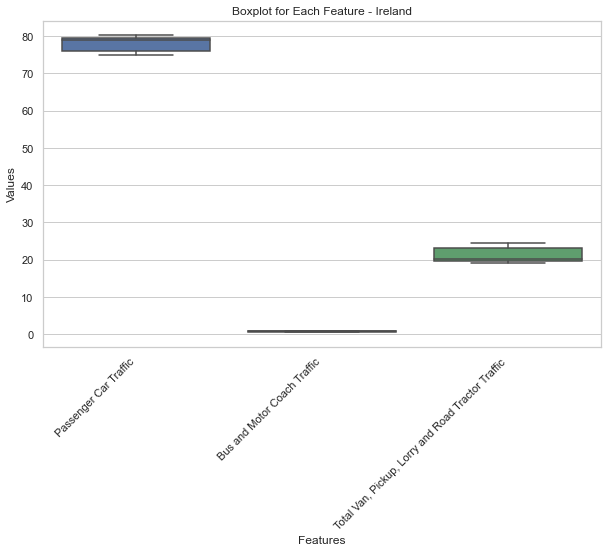

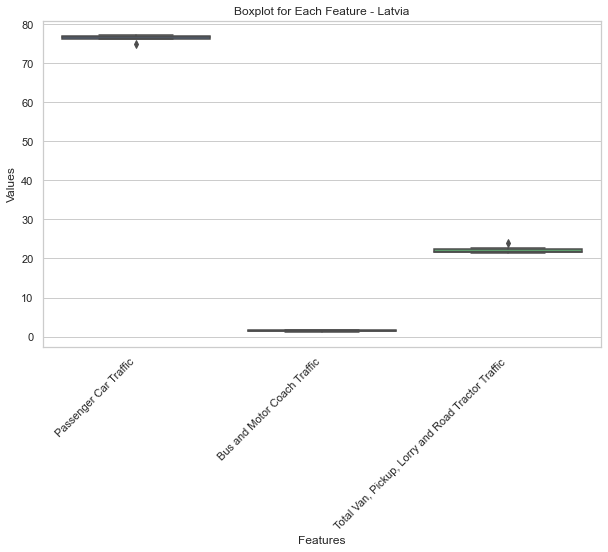

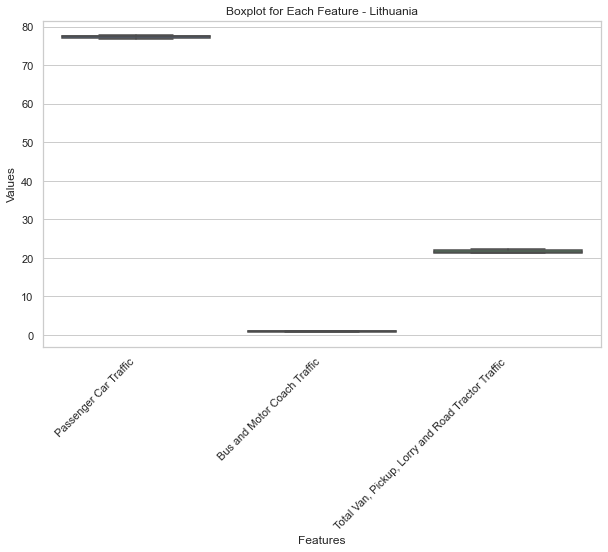

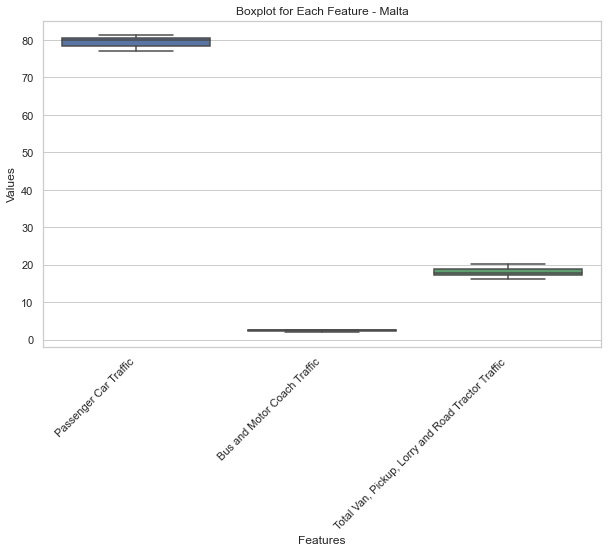

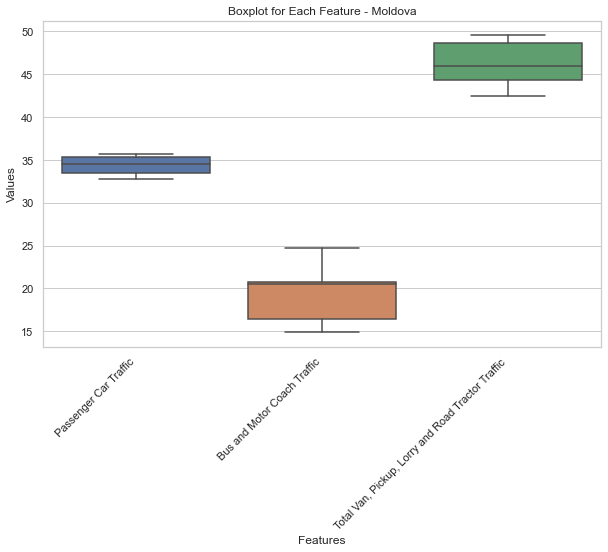

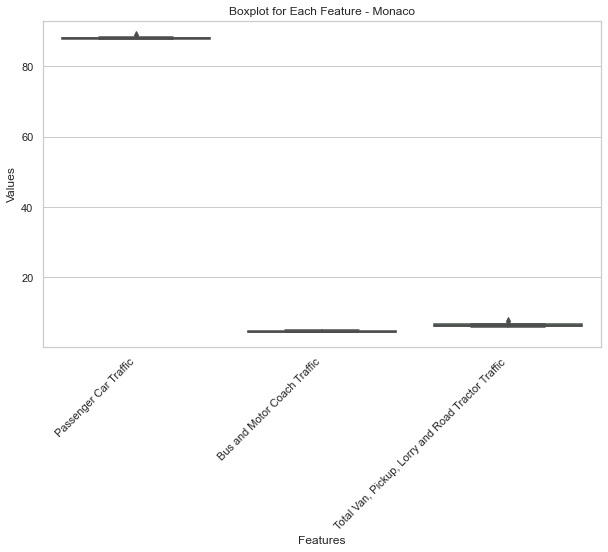

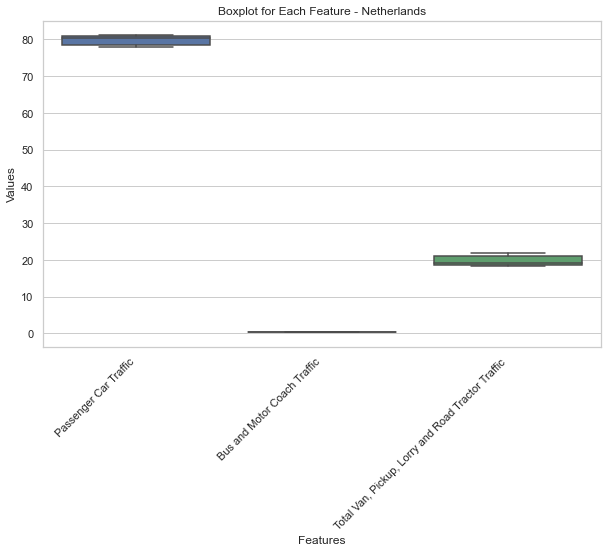

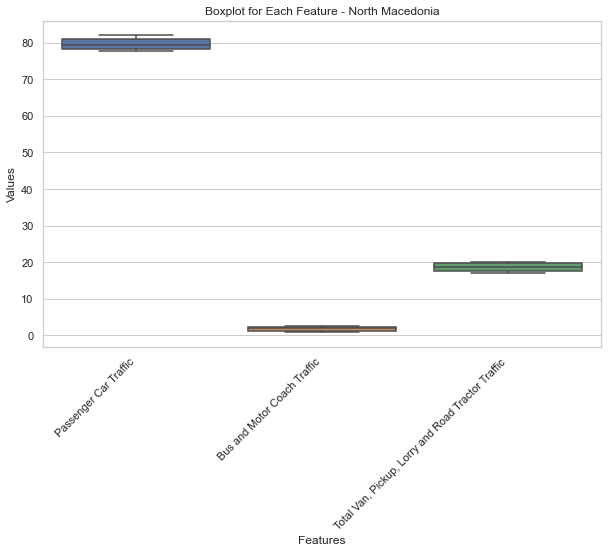

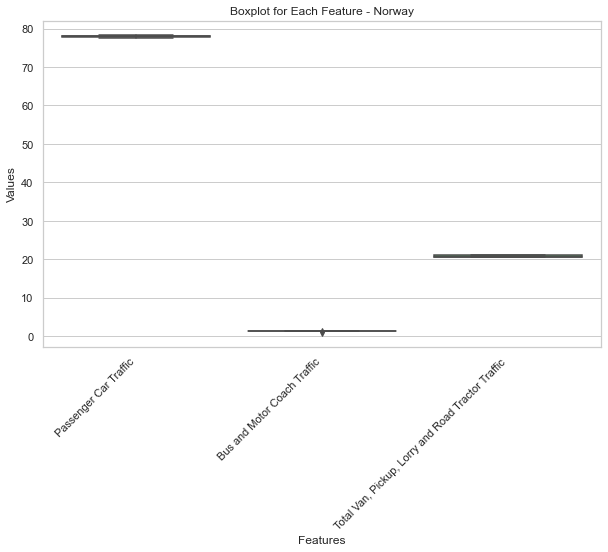

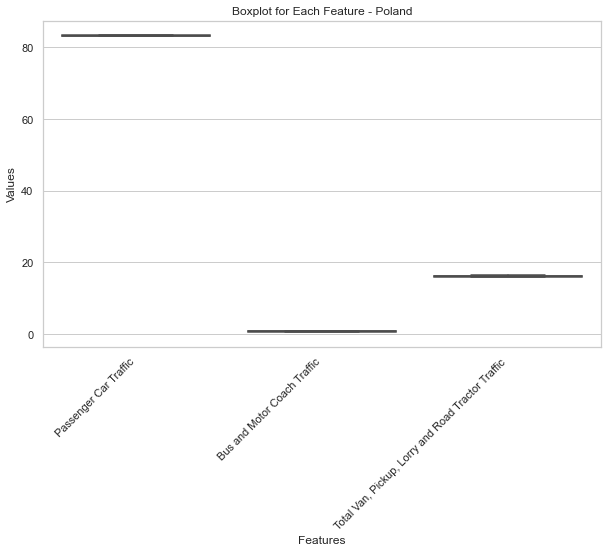

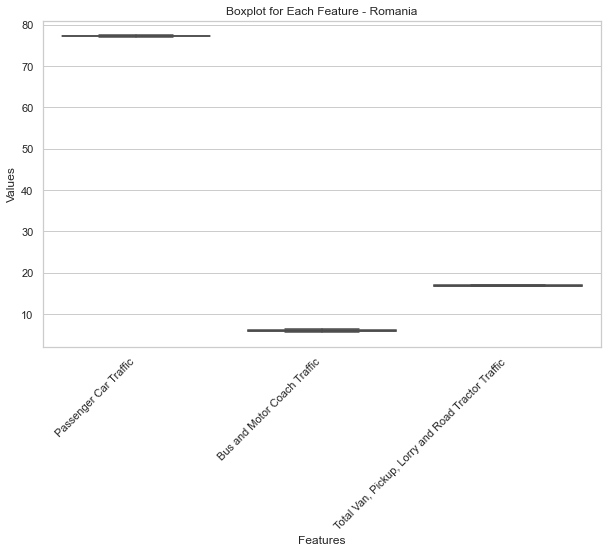

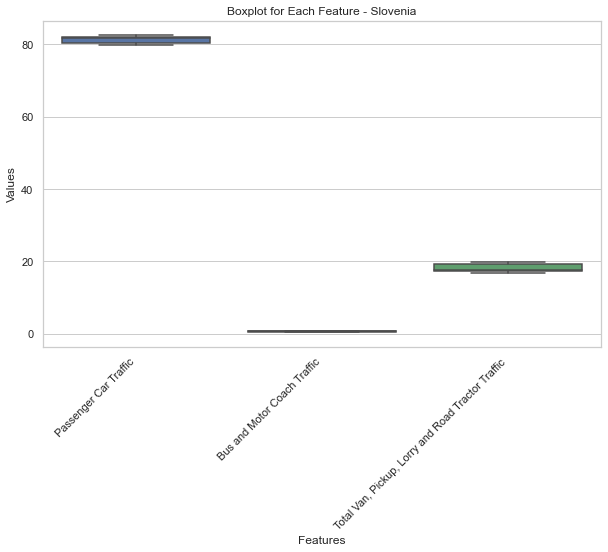

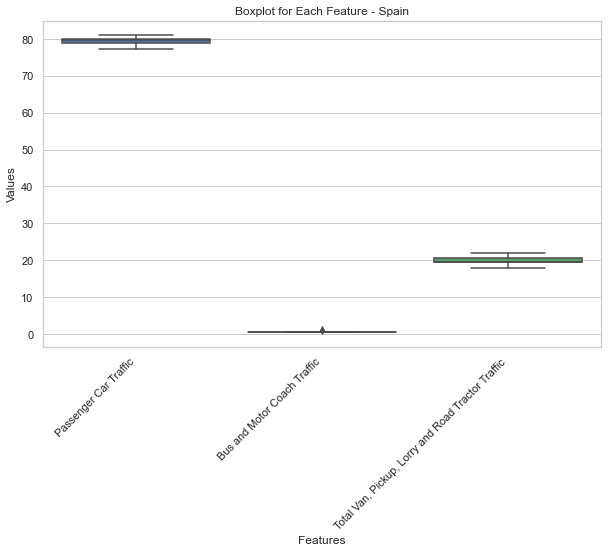

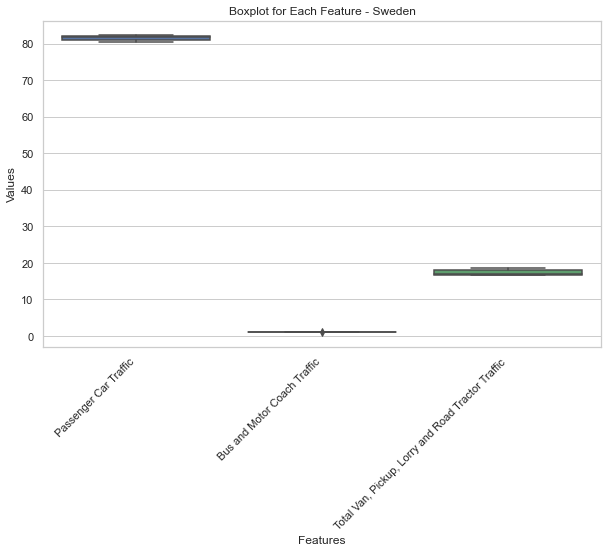

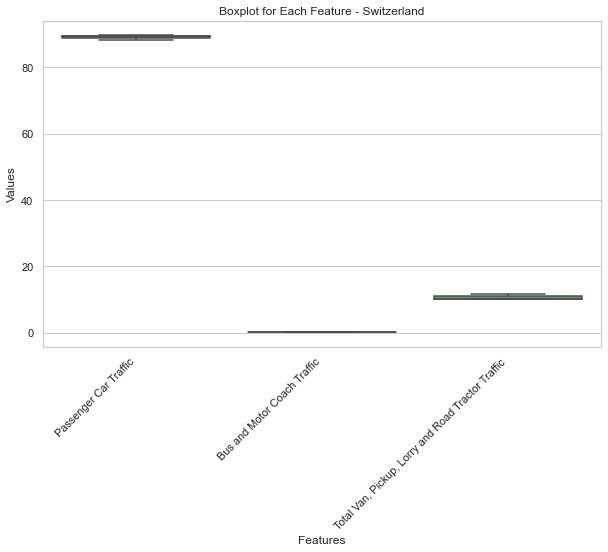

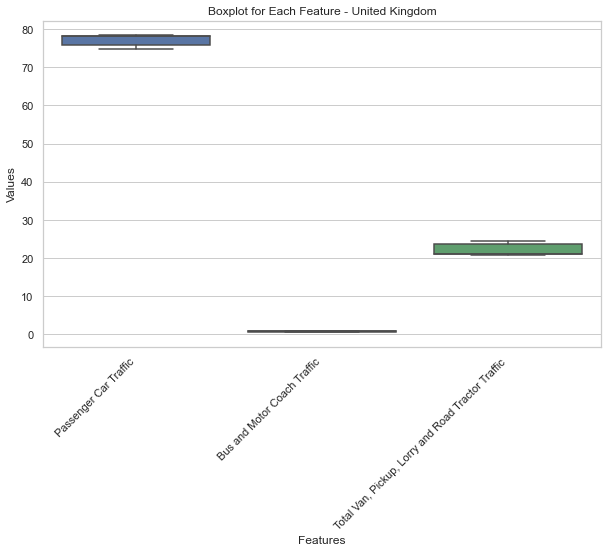

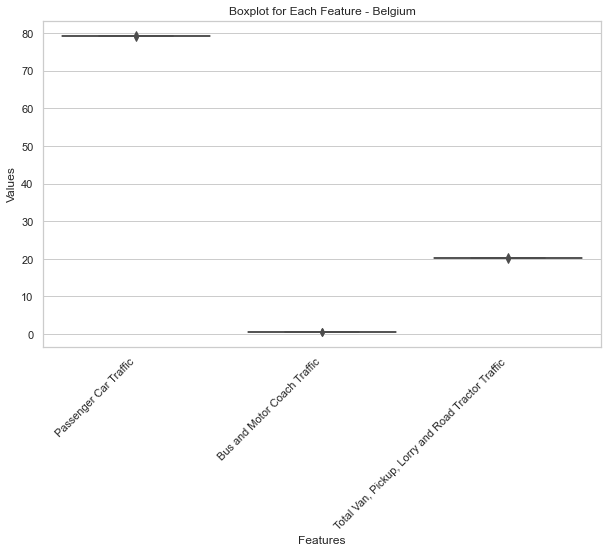

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.set(style="whitegrid")  # Set the style of the visualization

# Selecting the relevant columns for boxplot
boxplot_data = df.drop("Year", axis=1)

# Get unique categories
categories = df['Category'].unique()

# Create a separate boxplot for each category
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="variable", y="value", data=pd.melt(boxplot_data[boxplot_data["Category"] == category].iloc[:,1:]))
    plt.title(f"Boxplot for Each Feature - {category}")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

Given that data is now between 0 and 100 (given that we are talking about %) it would make sense to scale the dataset using MinMaxScales:

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Specify the columns to be scaled
columns_to_scale = ['Passenger Car Traffic', 'Bus and Motor Coach Traffic', 'Total Van, Pickup, Lorry and Road Tractor Traffic']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform only the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [33]:
df

,Category,Year,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic"
0,Austria,2016,0.930971,0.013921,0.153818
1,Austria,2017,0.930281,0.014069,0.154708
2,Austria,2018,0.924616,0.013323,0.162941
3,Austria,2019,0.917082,0.013473,0.173352
4,Austria,2020,0.909188,0.010596,0.185713
...,...,...,...,...,...
151,Belgium,2017,0.876188,0.013416,0.230261
152,Belgium,2018,0.878959,0.013568,0.226342
153,Belgium,2019,0.878959,0.013568,0.226342
154,Belgium,2020,0.878959,0.013568,0.226342


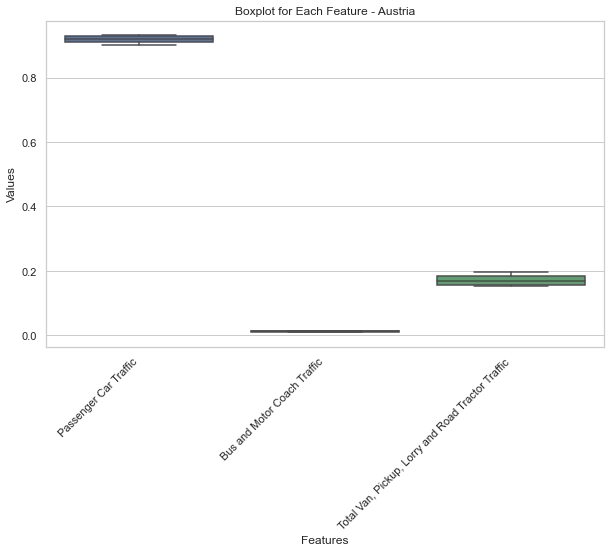

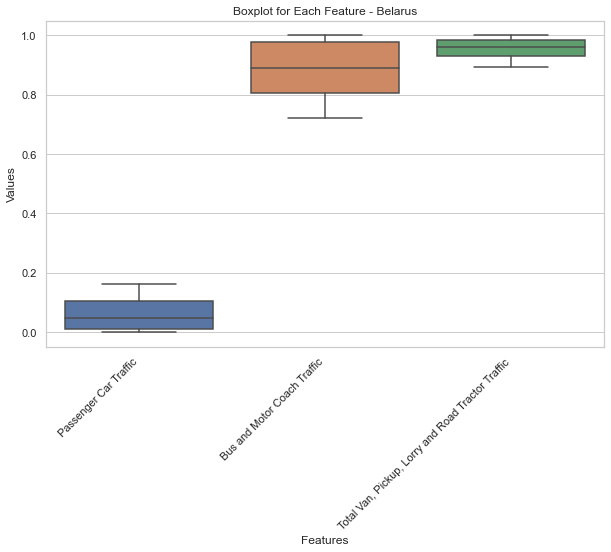

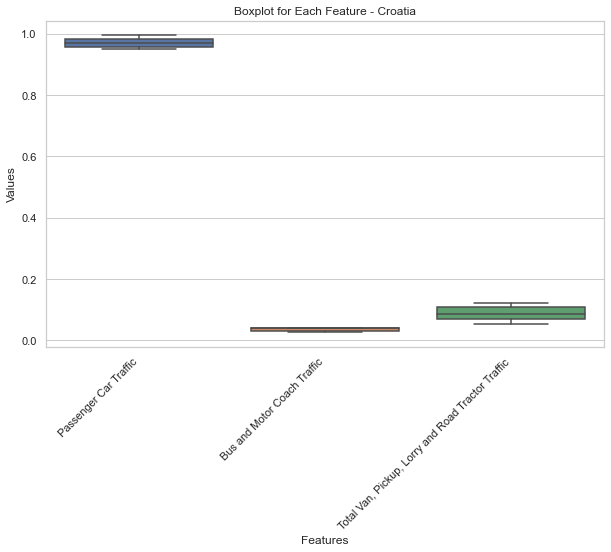

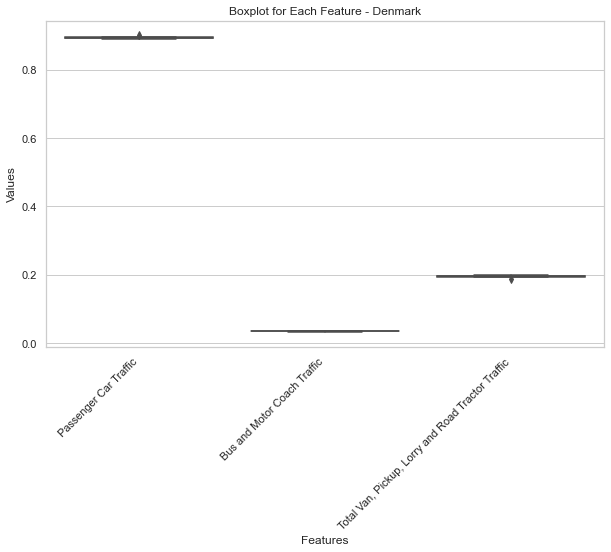

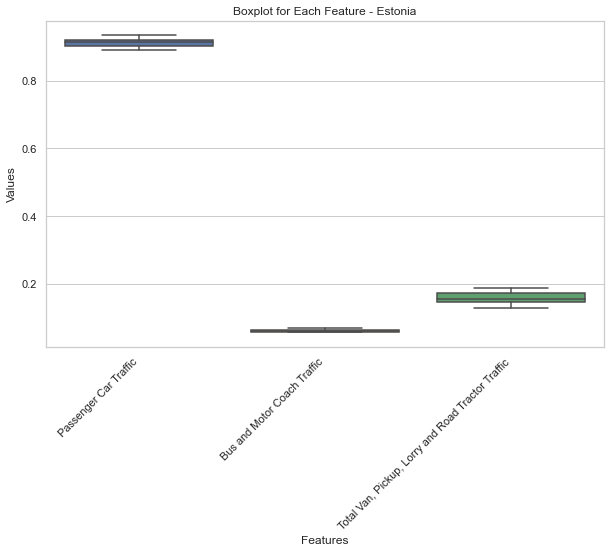

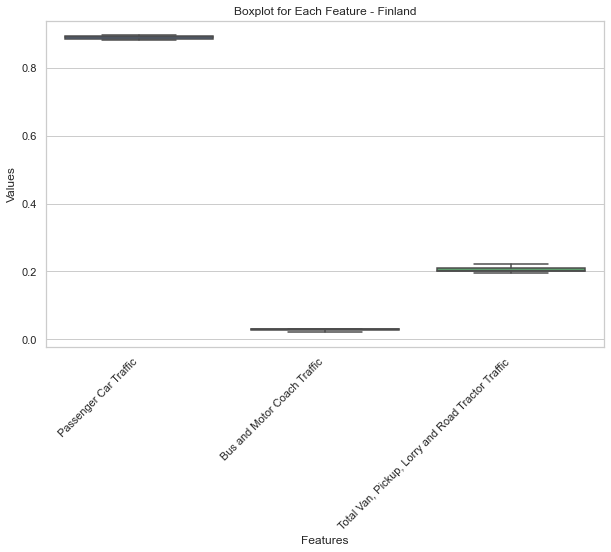

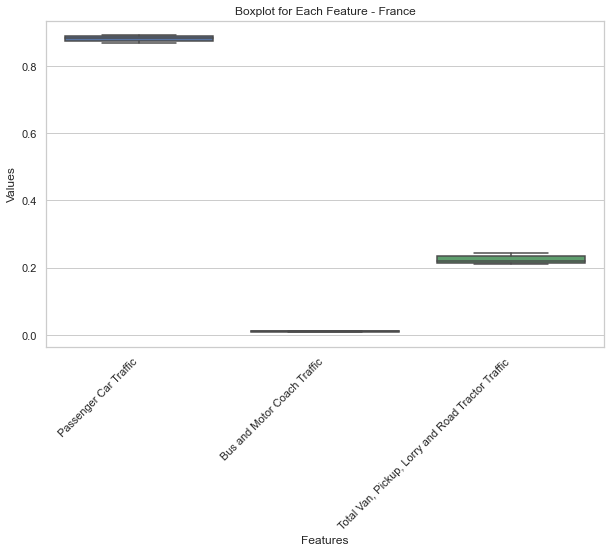

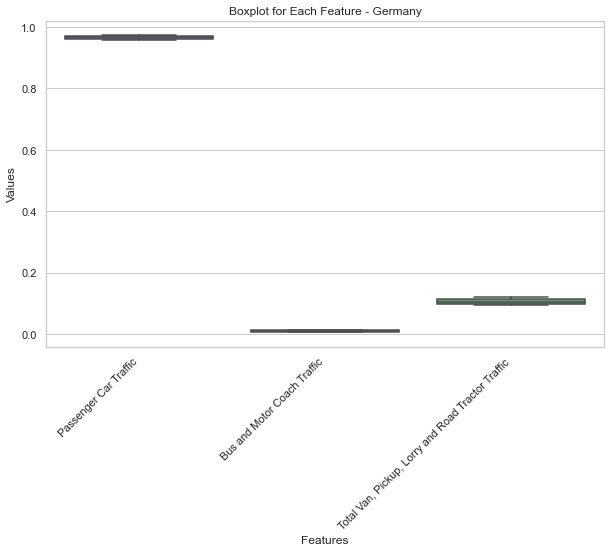

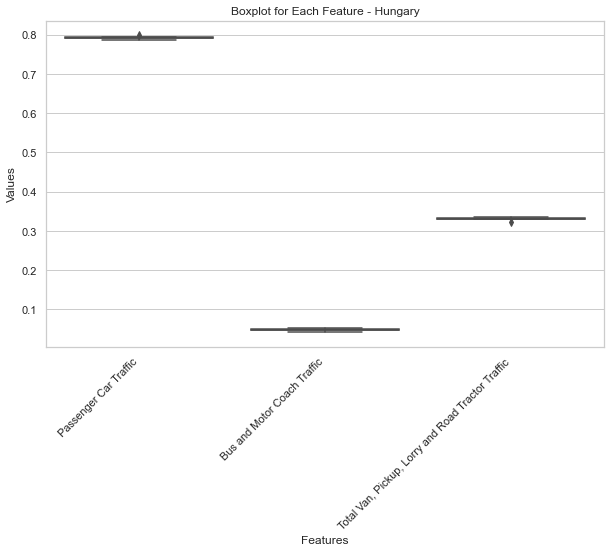

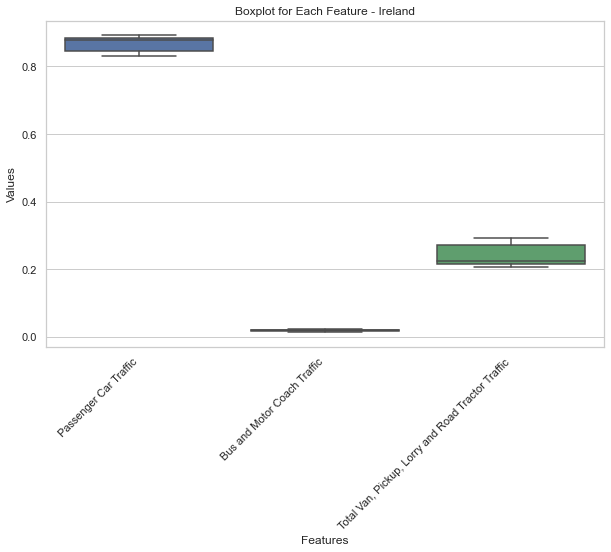

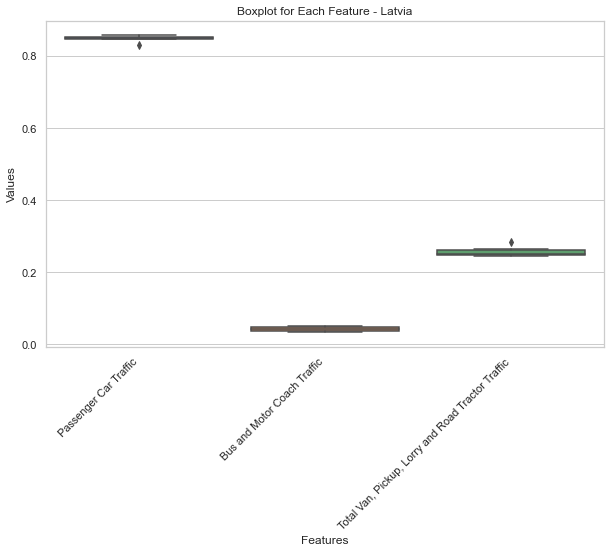

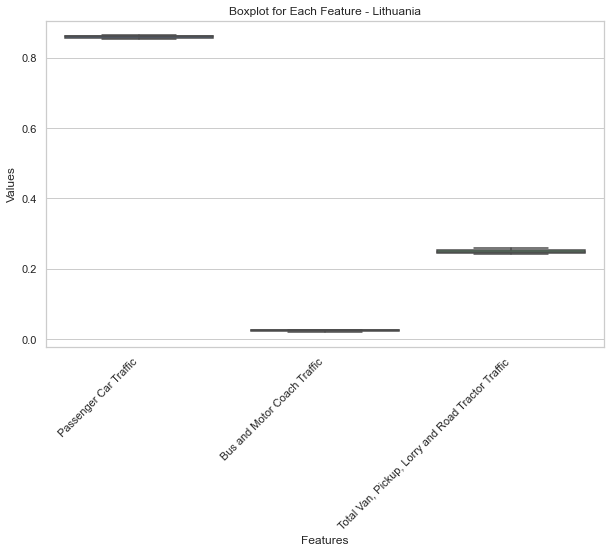

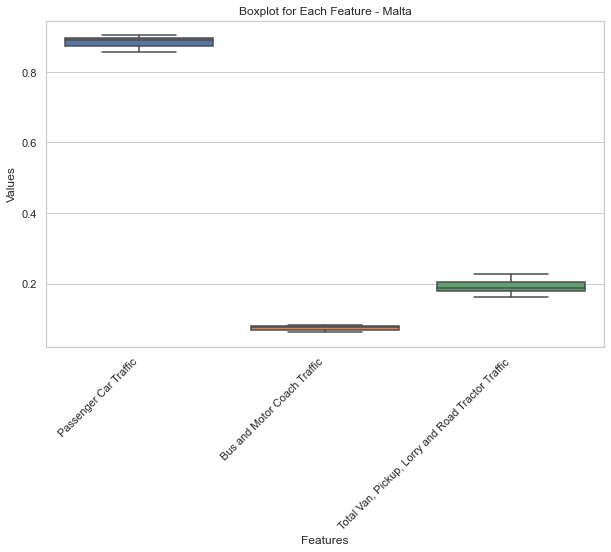

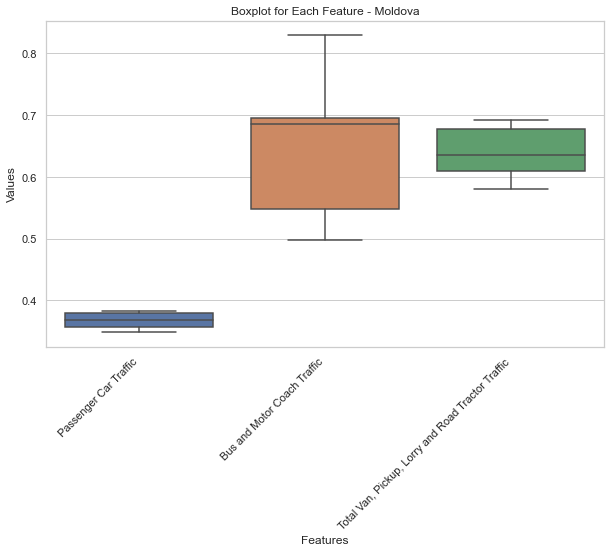

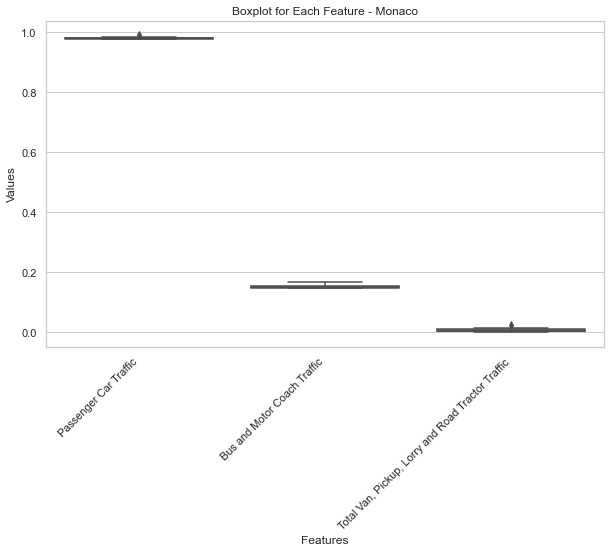

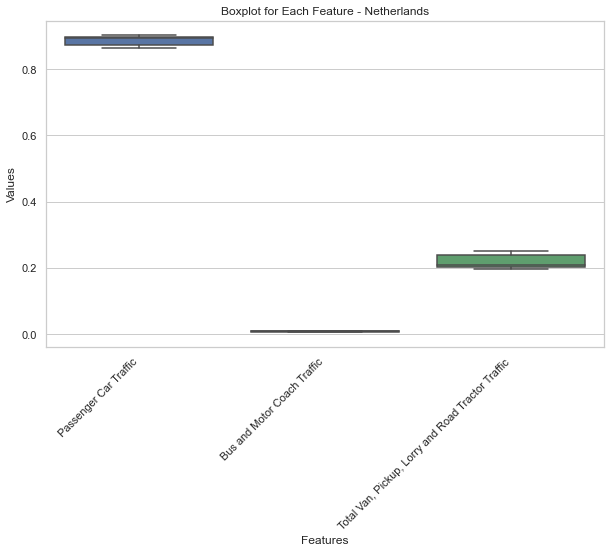

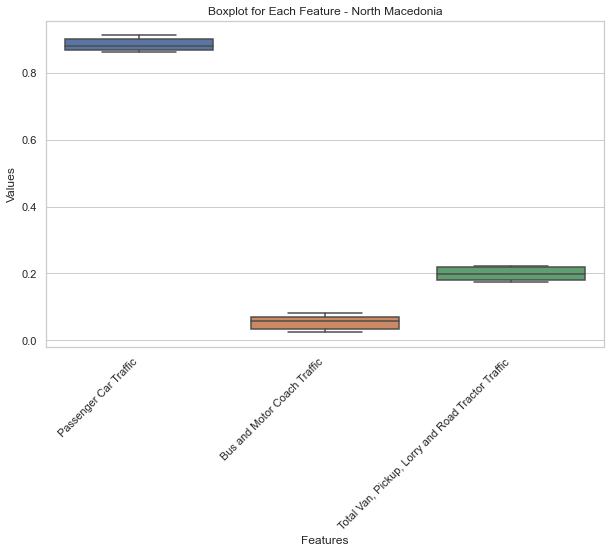

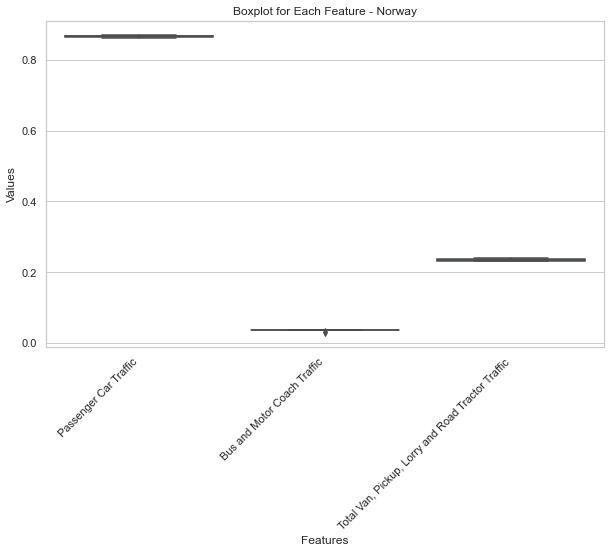

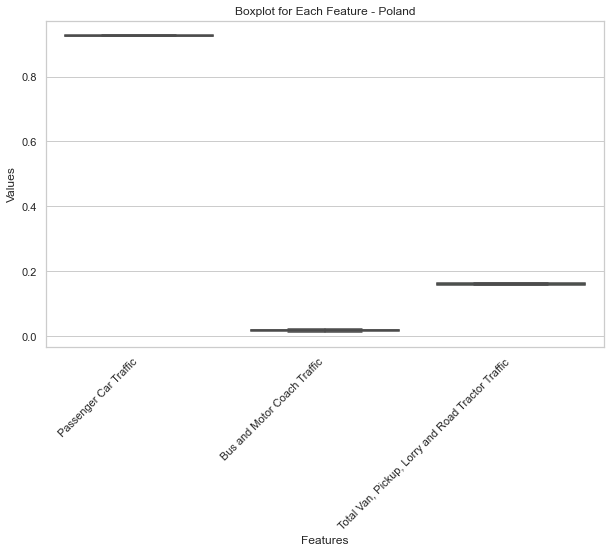

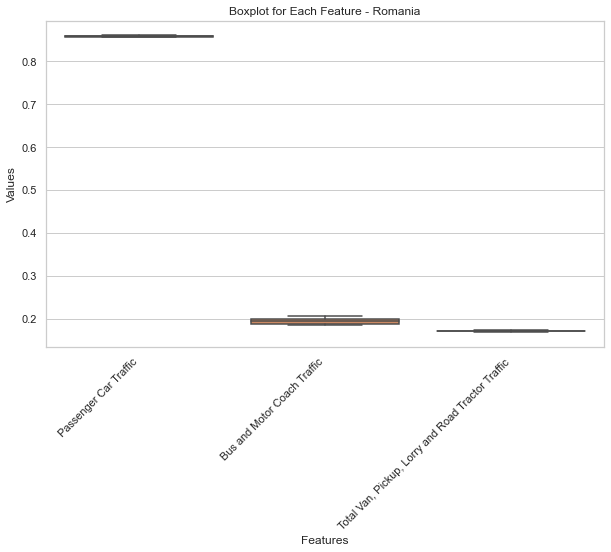

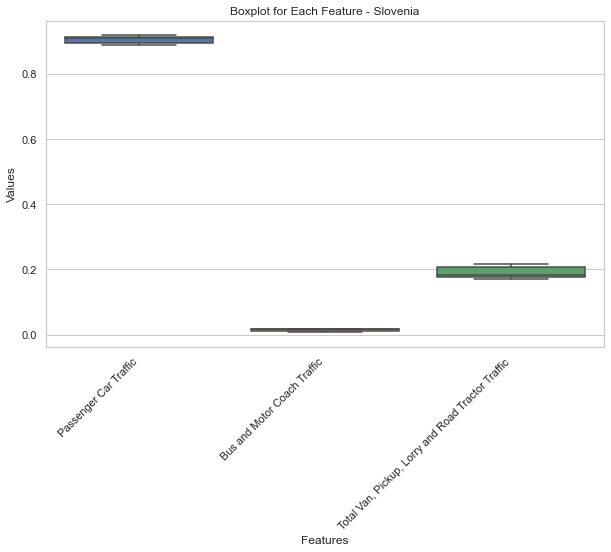

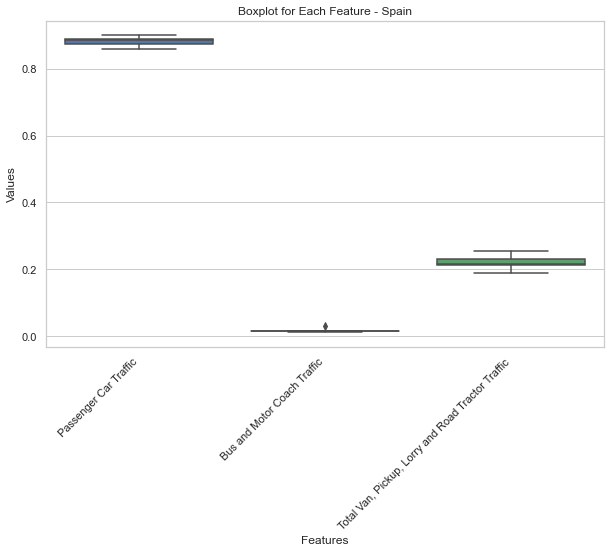

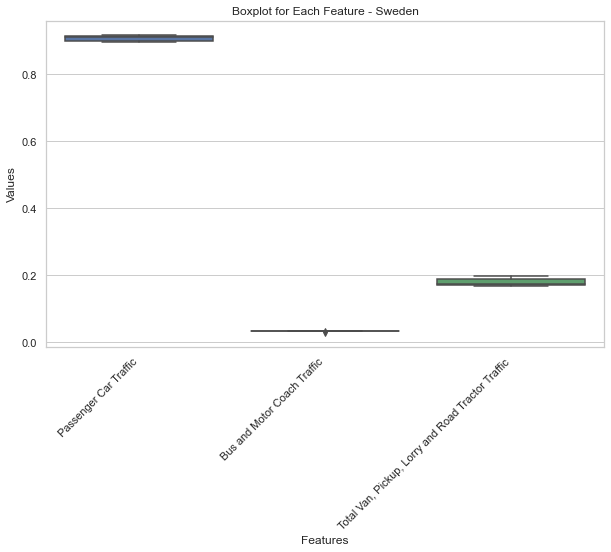

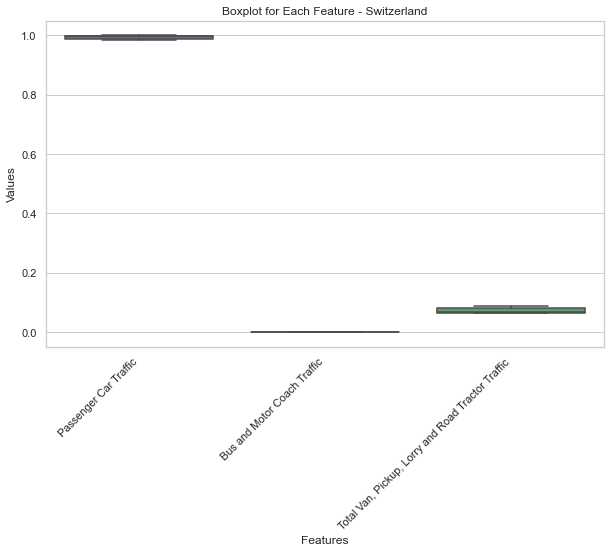

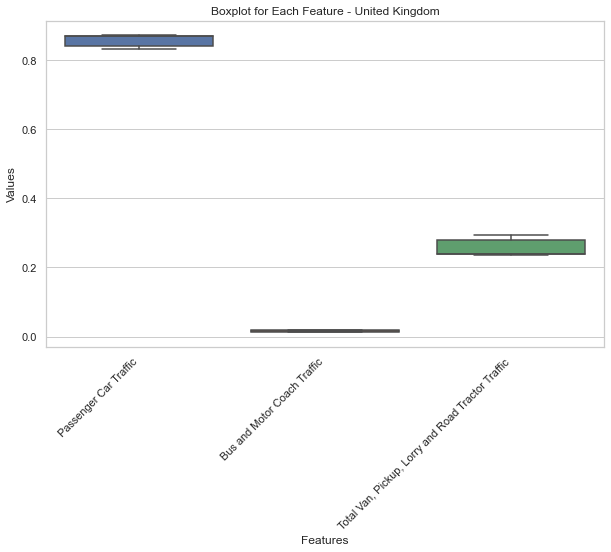

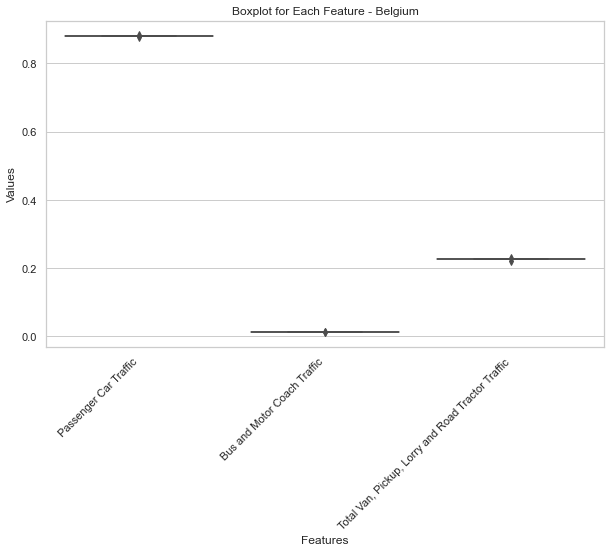

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.set(style="whitegrid")  # Set the style of the visualization

# Selecting the relevant columns for boxplot
boxplot_data = df.drop("Year", axis=1)

# Get unique categories
categories = df['Category'].unique()

# Create a separate boxplot for each category
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="variable", y="value", data=pd.melt(boxplot_data[boxplot_data["Category"] == category].iloc[:,1:]))
    plt.title(f"Boxplot for Each Feature - {category}")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

Given that visible outliers are not extremely far from the box-plot, we decide to keep them in the dataset so that we avoid:
- The need to create more syntetich data
- Missing values for some countries in specifi years

Now that our dataset has been transformed and prepared, we can continue our work with some statistics.

# Statistics for Data Analytics Tasks 1-4

#### ●	Use descriptive statistics and appropriate visualisations in order to summarise the dataset(s) used, and to help justify the chosen models. [0-20]

Now that our dataset has been cleaned, let's look at it:

In [34]:
df.head()

,Category,Year,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic"
0,Austria,2016,0.930971,0.013921,0.153818
1,Austria,2017,0.930281,0.014069,0.154708
2,Austria,2018,0.924616,0.013323,0.162941
3,Austria,2019,0.917082,0.013473,0.173352
4,Austria,2020,0.909188,0.010596,0.185713


The head function gave us an idea of what the dataset looks like, let's check its dimension:

In [35]:
# Dysplay the shape of our dataset
df.shape

(156, 5)

Let's now see the type of each column, the presence of null values and unique values for each column:

In [36]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Category                                           156 non-null    object 
 1   Year                                               156 non-null    int64  
 2   Passenger Car Traffic                              156 non-null    float64
 3   Bus and Motor Coach Traffic                        156 non-null    float64
 4   Total Van, Pickup, Lorry and Road Tractor Traffic  156 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.3+ KB


Another important thing we want to double-check is the presence of null values:

In [37]:
# Display sum of null values for each column
df.isnull().sum()

Category                                             0
Year                                                 0
Passenger Car Traffic                                0
Bus and Motor Coach Traffic                          0
Total Van, Pickup, Lorry and Road Tractor Traffic    0
dtype: int64

Let's see which countries are represented by this dataset and for what years:

In [40]:
# Display of unique Countries
df.Category.unique()

array(['Austria', 'Belarus', 'Croatia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Hungary', 'Ireland', 'Latvia', 'Lithuania',
       'Malta', 'Moldova', 'Monaco', 'Netherlands', 'North Macedonia',
       'Norway', 'Poland', 'Romania', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'Belgium'], dtype=object)

In [42]:
# Display of unique Years
df.Year.unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

So far we can say that our dataset contains transportation data  for European countries from 2016 to 2021.

Let's see the data distribution when using the describe function:

In [43]:
# Display data distribution
df.describe()

,Year,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic"
count,156.000000,156.000000,156.000000,156.000000
mean,2018.500000,0.843576,0.095637,0.236475
std,1.713325,0.192802,0.203472,0.181279
min,2016.000000,0.000000,0.000000,0.000000
25%,2017.000000,0.861141,0.013945,0.168644
50%,2018.500000,0.887486,0.029216,0.203518
75%,2020.000000,0.914434,0.057200,0.239181
max,2021.000000,1.000000,1.000000,1.000000


The data we see from the describe function is somehow interesting as it gives us an overview of how traffic by vehicle type is distributed across time and countries.

Let's look specifically at Ireland:

In [45]:
df.loc[df["Category"]=="Ireland"]

,Category,Year,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic"
54,Ireland,2016,0.891713,0.016772,0.207096
55,Ireland,2017,0.886555,0.018563,0.213429
56,Ireland,2018,0.879613,0.021027,0.221927
57,Ireland,2019,0.875842,0.021748,0.226835
58,Ireland,2020,0.834539,0.018825,0.285677
59,Ireland,2021,0.831206,0.014442,0.292379


In [47]:
df.loc[df["Category"]=="Ireland"].describe()

,Year,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic"
count,6.000000,6.000000,6.000000,6.000000
mean,2018.500000,0.866578,0.018563,0.241224
std,1.870829,0.026699,0.002701,0.037708
min,2016.000000,0.831206,0.014442,0.207096
25%,2017.250000,0.844865,0.017220,0.215554
50%,2018.500000,0.877728,0.018694,0.224381
75%,2019.750000,0.884820,0.020477,0.270967
max,2021.000000,0.891713,0.021748,0.292379


Looking at years available it seems that Ireland's traffic is composed by:
- A mean of 86% for passenger traffic, 2% for bus and motor coach traffic and 24% for other four wheeled vehicles
- A max of 89% for passenger traffic, 2% for bus and motor coach traffic and 29% for other four wheeled vehicles
- A min of 83% for passenger traffic, 1% for bus and motor coach traffic and 21% for other four wheeled vehicles

Let's visualize the trend of Ireland traffic by vehicle type over time:

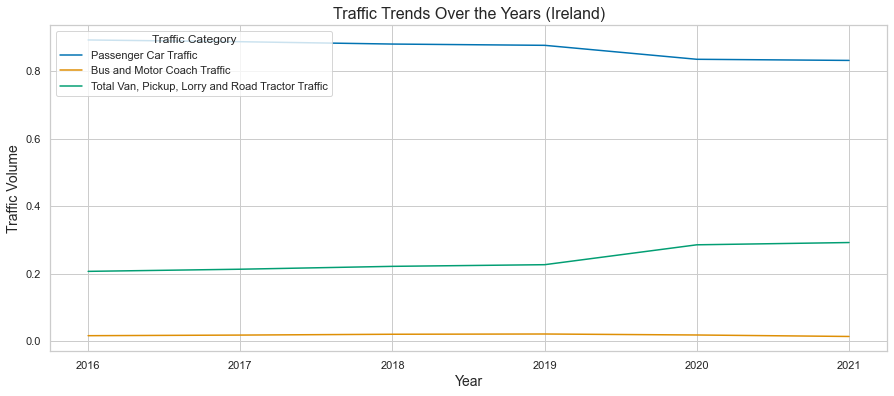

In [54]:
# Filter the DataFrame to extract vehicle categories for Ireland
passenger_df = df[df['Category'] == 'Ireland'][["Passenger Car Traffic", "Year"]]
bus_df = df[df['Category'] == 'Ireland'][["Bus and Motor Coach Traffic", "Year"]]
other_df = df[df['Category'] == 'Ireland'][["Total Van, Pickup, Lorry and Road Tractor Traffic", "Year"]]

# Create separate figures for better clarity
fig, ax = plt.subplots(figsize=(15, 6))

# Use a color palette that is colorblind-friendly
palette = sns.color_palette("colorblind")

# Plot separate lines for passenger car, bus, and other traffic
sns.lineplot(x='Year', y='Passenger Car Traffic', data=passenger_df, label="Passenger Car Traffic", color=palette[0], ax=ax)
sns.lineplot(x='Year', y='Bus and Motor Coach Traffic', data=bus_df, label="Bus and Motor Coach Traffic", color=palette[1], ax=ax)
sns.lineplot(x='Year', y='Total Van, Pickup, Lorry and Road Tractor Traffic', data=other_df, label="Total Van, Pickup, Lorry and Road Tractor Traffic", color=palette[2], ax=ax)

# Increase the font size for labels and title
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Traffic Volume', fontsize=14)
ax.set_title('Traffic Trends Over the Years (Ireland)', fontsize=16)

# Improve legend placement and add a title
ax.legend(title='Traffic Category', title_fontsize='12', loc='upper left')

plt.show()

Even though Bus and Motor coach traffic has been quite steady if we compare it to the other two types of traffic, it's interesting to see how passenger car traffic has decreased since 2019. This might indeed be related to Covid.

Let's now better visualize describe results we were previously looking at:

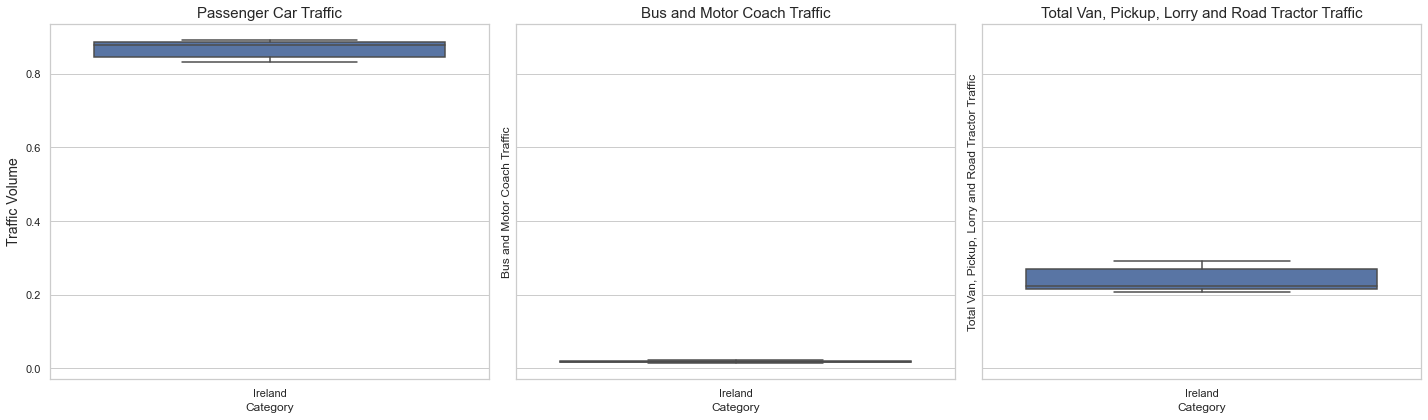

In [63]:
# Filter the DataFrame to extract data for Ireland
ireland_df = df[df['Category'] == 'Ireland']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey=True)

# Create boxplots for each column
sns.boxplot(x='Category', y='Passenger Car Traffic', data=ireland_df, ax=axes[0])
sns.boxplot(x='Category', y='Bus and Motor Coach Traffic', data=ireland_df, ax=axes[1])
sns.boxplot(x='Category', y='Total Van, Pickup, Lorry and Road Tractor Traffic', data=ireland_df, ax=axes[2])

# Set titles for each subplot
axes[0].set_title('Passenger Car Traffic', fontsize=15)
axes[1].set_title('Bus and Motor Coach Traffic', fontsize=15)
axes[2].set_title('Total Van, Pickup, Lorry and Road Tractor Traffic', fontsize=15)

# Set common y-axis label
axes[0].set_ylabel('Traffic Volume', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

Let's try to rebuild the graphs giving their own scale to the y axis:

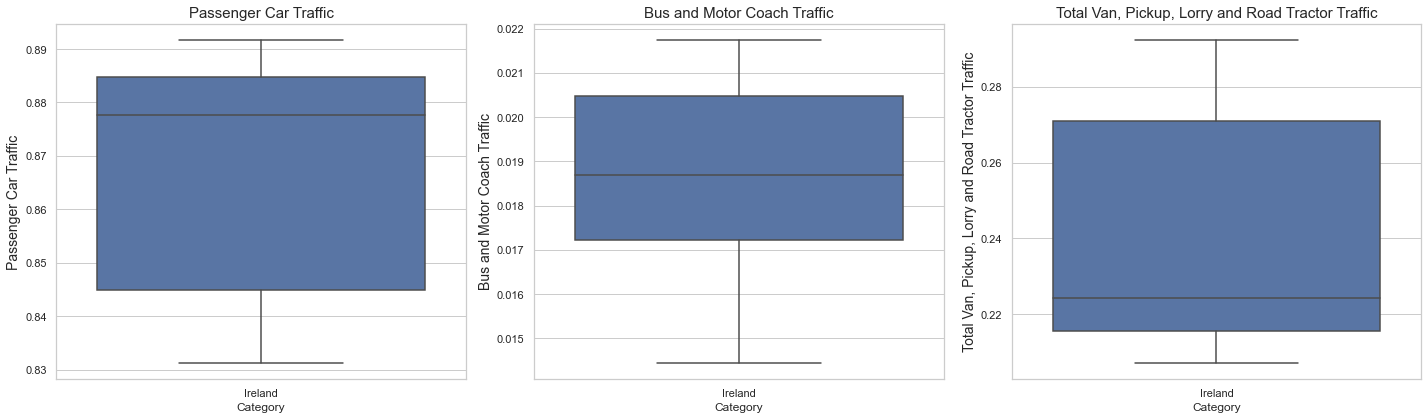

In [64]:
# Filter the DataFrame to extract data for Ireland
ireland_df = df[df['Category'] == 'Ireland']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Create boxplots for each column with individual y-axes
sns.boxplot(x='Category', y='Passenger Car Traffic', data=ireland_df, ax=axes[0])
sns.boxplot(x='Category', y='Bus and Motor Coach Traffic', data=ireland_df, ax=axes[1])
sns.boxplot(x='Category', y='Total Van, Pickup, Lorry and Road Tractor Traffic', data=ireland_df, ax=axes[2])

# Set titles for each subplot
axes[0].set_title('Passenger Car Traffic', fontsize=15)
axes[1].set_title('Bus and Motor Coach Traffic', fontsize=15)
axes[2].set_title('Total Van, Pickup, Lorry and Road Tractor Traffic', fontsize=15)

# Set individual y-axis labels
axes[0].set_ylabel('Passenger Car Traffic', fontsize=14)
axes[1].set_ylabel('Bus and Motor Coach Traffic', fontsize=14)
axes[2].set_ylabel('Total Van, Pickup, Lorry and Road Tractor Traffic', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

Interestingly we see that Bus and Motor Coach Traffic hasn't been changing too much over time, with the mean right at the middle and a low standard deviation.

The situation for the two others vehicle type is quite different to the bus one and opposite to each other (predictable given that we are analysing %). Let's now calculate mean, median, mode and standard deviationf or the different traffic by vechicles columns:

In [69]:
median_passenger_traffic = ireland_df["Passenger Car Traffic"].sum()/2
median_bus_traffic = ireland_df["Bus and Motor Coach Traffic"].sum()/2
median_other_traffic = ireland_df["Total Van, Pickup, Lorry and Road Tractor Traffic"].sum()/2

print(f"Median of Passenger Car Traffic % in Ireland is {median_passenger_traffic}")
print(f"Median of Bus and Motor Coach Traffic % in Ireland is {median_bus_traffic}")
print(f"Median of Total Van, Pickup, Lorry and Road Tractor Traffic % in Ireland is {median_other_traffic}")

Median of Passenger Car Traffic % in Ireland is 2.599734157860812
Median of Bus and Motor Coach Traffic % in Ireland is 0.05568882856304127
Median of Total Van, Pickup, Lorry and Road Tractor Traffic % in Ireland is 0.7236719942389531


In [79]:
import pandas as pd

# Assuming your DataFrame is named df
# Extract columns 2, 3, and 4
selected_columns = ireland_df.iloc[:, 2:5]

# Compute Mean, Median, Mode, and Standard Deviation
mean_values = selected_columns.mean()
median_values = selected_columns.median()
mode_values = selected_columns.mode().iloc[0]  # Mode may have multiple values, so take the first one
std_dev_values = selected_columns.std()

# Create a summary DataFrame
summary_ireland_df = pd.DataFrame({
    'Mean': mean_values*100,
    'Median': median_values*100,
    'Mode': mode_values*100,
    'Standard Deviation': std_dev_values*100
})

In [80]:
summary_ireland_df

,Mean,Median,Mode,Standard Deviation
Passenger Car Traffic,86.657805,87.772757,83.120605,2.669924
Bus and Motor Coach Traffic,1.856294,1.869431,1.444190,0.270087
"Total Van, Pickup, Lorry and Road Tractor Traffic",24.122400,22.438121,20.709604,3.770837


Let's now see how this data compares with rest of Europe:

In [82]:
no_ireland_df = df[df['Category'] != 'Ireland']

In [83]:
no_ireland_df

,Category,Year,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic"
0,Austria,2016,0.930971,0.013921,0.153818
1,Austria,2017,0.930281,0.014069,0.154708
2,Austria,2018,0.924616,0.013323,0.162941
3,Austria,2019,0.917082,0.013473,0.173352
4,Austria,2020,0.909188,0.010596,0.185713
...,...,...,...,...,...
151,Belgium,2017,0.876188,0.013416,0.230261
152,Belgium,2018,0.878959,0.013568,0.226342
153,Belgium,2019,0.878959,0.013568,0.226342
154,Belgium,2020,0.878959,0.013568,0.226342


In [84]:
# Assuming your DataFrame is named df
# Extract columns 2, 3, and 4
selected_columns = no_ireland_df.iloc[:, 2:5]

# Compute Mean, Median, Mode, and Standard Deviation
mean_values = selected_columns.mean()
median_values = selected_columns.median()
mode_values = selected_columns.mode().iloc[0]  # Mode may have multiple values, so take the first one
std_dev_values = selected_columns.std()

# Create a summary DataFrame
summary_no_ireland_df = pd.DataFrame({
    'Mean': mean_values*100,
    'Median': median_values*100,
    'Mode': mode_values*100,
    'Standard Deviation': std_dev_values*100
})

In [85]:
summary_no_ireland_df

,Mean,Median,Mode,Standard Deviation
Passenger Car Traffic,84.265596,88.825158,87.895908,19.652827
Bus and Motor Coach Traffic,9.871954,3.062681,1.356844,20.692767
"Total Van, Pickup, Lorry and Road Tractor Traffic",23.628519,19.998857,22.634184,18.476125


From the data extracted, we can observe the following:

- Passenger Car Traffic: The mean and median values for passenger car traffic in Ireland are higher than the mean for Europe excluding Ireland, but slightly lower than the European median. This suggests that Ireland has a higher reliance on passenger cars compared to the average European country, but not the highest. The standard deviation is significantly lower in Ireland, indicating less variability in passenger car traffic.


- Bus and Motor Coach Traffic: The mean and median values for bus and motor coach traffic in Ireland are significantly lower than in Europe excluding Ireland. This could suggest a lower reliance on public transportation in Ireland. The standard deviation is also much lower in Ireland, indicating less variability in bus and motor coach traffic.


- Total Van, Pickup, Lorry and Road Tractor Traffic: The mean value for this category in Ireland is slightly higher than the mean for Europe excluding Ireland, but the median is higher in Europe. This suggests that Ireland might have a higher reliance on these types of vehicles compared to the average European country, but not the highest. The standard deviation is lower in Ireland, indicating less variability in this type of traffic.


- Possible causes for these differences could be related to the geographical, economic, and infrastructural characteristics of Ireland. For example, Ireland’s smaller size and population density could lead to a higher reliance on personal vehicles (passenger cars) and less on public transportation (buses and motor coaches). Economic factors such as income levels, cost of vehicle ownership, and cost of public transportation could also play a role. Infrastructure factors such as the availability and quality of public transportation, road networks, and traffic congestion could also influence these patterns.

#### ●	Analyse the variables in your dataset(s) and use appropriate inferential statistics to gain insights on possible population values (e.g., if you were working with public transport, you could find a confidence interval for the population proportion of users commuting to Dublin by train). [0-20]

In [53]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [127]:
# We want to find a confidence interval for the mean of "Bus and Motor Coach Traffic" in Ireland
bus_traffic_data_dublin = ireland_df['Bus and Motor Coach Traffic']

# Calculate the confidence interval
confidence_interval = stats.norm.interval(0.95, loc=np.mean(bus_traffic_data_dublin), scale=np.std(bus_traffic_data_dublin))

print("95% Confidence Interval for Bus Car Traffic Mean:", confidence_interval)

95% Confidence Interval for Bus Car Traffic Mean: (0.013730561054052333, 0.023395324654641843)


In [90]:
t_stat, p_value = stats.ttest_1samp(bus_traffic_data_dublin, 0.05)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -28.511084529659996
P-value: 9.943239064306657e-07


Interpretation of Confidence Interval:
- The confidence interval provides a range in which we can be reasonably confident that the true population mean lies.

Interpretation of p-value from t-Test:
- The p-value from the t-test is compared to a significance level (commonly 0.05) to determine if there is enough evidence to reject the null hypothesis.

In this case, the small p-value (below 0.05) suggests that there is evidence to reject the null hypothesis that the mean of "Bus and Motor Coach Traffic" is equal to 5%.

Let's try to do the same test for 2%:

In [93]:
t_stat, p_value = stats.ttest_1samp(bus_traffic_data_dublin, 0.02)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.303304490742629
P-value: 0.24925528024925608


Interpretation:
- The t-statistic of -1.30 is the test statistic, indicating how many standard errors the sample mean of Dublin is from the assumed population mean of 0.015.
- The p-value of 0.25 is the probability of observing such an extreme t-statistic under the assumption that the null hypothesis (mean equals 300) is true.

Conclusion:
- With a p-value greater than the commonly used significance level of 0.05, we fail to reject the null hypothesis.
- There is not enough evidence to suggest that the mean of "Bus and Motor Coach Traffic" in Dublin is significantly different from 2% at a 5% significance level.

Therefore, based on this analysis, we do not have sufficient statistical evidence to conclude that the mean bus and motor coach traffic in Dublin differs significantly from 2%.

And in fact, if we look at result over the years we can see that min is 1.4% and max 2.2% with a mean of 1.9%

In [98]:
ireland_df[["Year", "Bus and Motor Coach Traffic"]].describe()

,Year,Bus and Motor Coach Traffic
count,6.000000,6.000000
mean,2018.500000,0.018563
std,1.870829,0.002701
min,2016.000000,0.014442
25%,2017.250000,0.017220
50%,2018.500000,0.018694
75%,2019.750000,0.020477
max,2021.000000,0.021748


Let's also visualize this Confidence interval:

DataFrame with Confidence Intervals:
                                                  Lower Bound Upper Bound
Passenger Car Traffic                                0.814248    0.918908
Bus and Motor Coach Traffic                          0.013269    0.023857
Total Van, Pickup, Lorry and Road Tractor Traffic    0.167317    0.315131


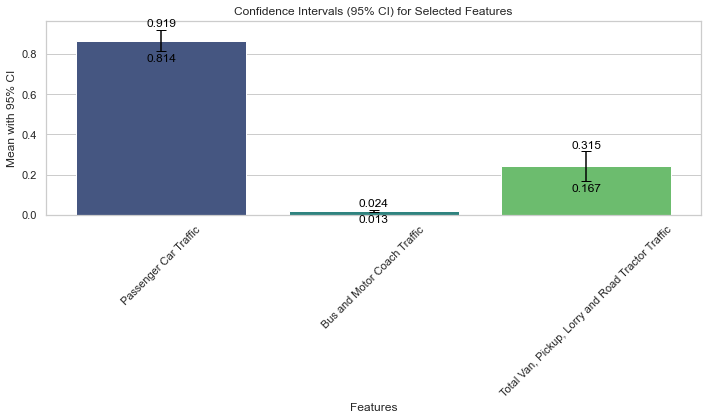

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Assuming your DataFrame is named ireland_df
# Replace 'your_dataframe.csv' with the actual file or DataFrame
# containing your data.
# ireland_df = pd.read_csv('your_dataframe.csv')

# Select the features for which you want to calculate confidence intervals
features = ['Passenger Car Traffic', 'Bus and Motor Coach Traffic', 'Total Van, Pickup, Lorry and Road Tractor Traffic']

# Create a new DataFrame to store confidence intervals
ci_df = pd.DataFrame(index=features, columns=['Lower Bound', 'Upper Bound'])

# Calculate confidence intervals for each feature using stats.norm.interval
for feature in features:
    mean = ireland_df[feature].mean()
    std_dev = ireland_df[feature].std()
    confidence_interval = stats.norm.interval(0.95, loc=mean, scale=std_dev)
    ci_df.loc[feature] = confidence_interval

# Display the DataFrame with confidence intervals
print("DataFrame with Confidence Intervals:")
print(ci_df)

# Plotting the graph with numbers near the CI range
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ci_df.index, y=(ci_df['Lower Bound'] + ci_df['Upper Bound']) / 2, palette="viridis")

# Add numeric values near the CI range
for index, feature in enumerate(features):
    lower_bound, upper_bound = ci_df.loc[feature]
    plt.text(index, upper_bound + 0.005, f'{upper_bound:.3f}', ha='center', va='bottom', color='black')
    plt.text(index, lower_bound - 0.01, f'{lower_bound:.3f}', ha='center', va='top', color='black')

plt.errorbar(x=ci_df.index, y=(ci_df['Lower Bound'] + ci_df['Upper Bound']) / 2,
             yerr=(ci_df['Upper Bound'] - ci_df['Lower Bound']) / 2,
             fmt='none', color='black', capsize=5)

plt.title("Confidence Intervals (95% CI) for Selected Features")
plt.ylabel("Mean with 95% CI")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The width of the confidence interval reflects the precision of the estimate. A narrower interval means that the estimate is more precise, while a wider interval means that the estimate is less precise.

In the results obtained for Ireland, the confidence interval for bus and motor coach traffic is wider than the confidence interval for passenger car traffic, because the sample size for bus and motor coach traffic is smaller, the confidence level is the same, and the variability in the data is higher.

This means that the estimate for bus and motor coach traffic is less precise than the estimate for passenger car traffic.

#### ● Undertake research to find similarities between some country(s) against Ireland and apply parametric and non-parametric inferential statistical techniques to compare them (e.g., t-test, analysis of variance, Wilcoxon test, chi-squared test, among others). You must justify your choices and verify the applicability of the tests. Hypotheses and conclusions must be clearly stated. You are expected to use at least 5 different inferential statistics tests. [0-40]

Now tha twe got an understanding of what are Confidence Intervals for specific traffic vehicles in Ireland, let's see how we can compare to other countries in Europe.

Parametric inferential statistical techniques used are:
- T-Test
- One-Way ANOVA
- Two-Way ANOVA

Non-parametric inferential statistical techniques used are:
- Kruskal-Wallis
- Wilcoxon test
- Chi-squared test


Before proceeding with parametric inferential statistical techniques, we need to make sure that our data follows the specific assumptions:
- The populations are independent. In other words, their outcomes do not affect each other.
- The populations have a normal distribution.
- The variances of the normal distributions are equal.

https://www.pythonfordatascience.org/parametric-assumptions-python/

The first test to perform it's to verify that the population is independent. 

In the context of time-series data, the concept of independence refers to the assumption that each observation in the time series is not influenced by or dependent on the previous observations. To verify this we perform an autocorrelation test called Ljung-Box test. 

Let's start with Passenger Car Traffic in Ireland first:

In [54]:
time_series = df[["Category", "Year", "Passenger Car Traffic"]]
time_series_ireland = time_series.loc[time_series["Category"]=="Ireland"].iloc[:,1:]
# Set 'Year' as the index
time_series_ireland.set_index('Year', inplace=True)

This is the time-series we want to check if autocorrelated or not:

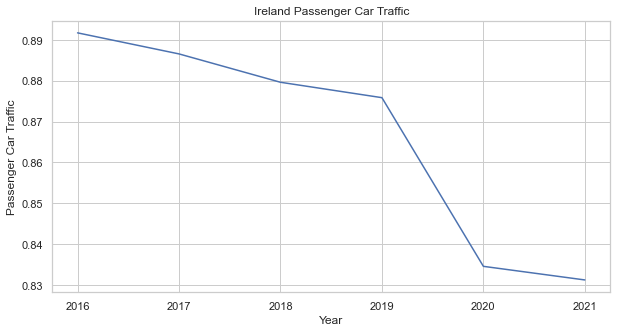

In [55]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(time_series_ireland['Passenger Car Traffic'])
plt.title('Ireland Passenger Car Traffic')
plt.xlabel('Year')
plt.ylabel('Passenger Car Traffic')
plt.show()

In [56]:
# Conduct the Ljung-Box test for autocorrelation
lags = min(3, len(time_series_ireland)-1)
results = sm.stats.acorr_ljungbox(time_series_ireland['Passenger Car Traffic'], lags=lags, return_df=True)

In [57]:
# Display the test results
print("Ljung-Box Test Results:")
print(results)

Ljung-Box Test Results:
    lb_stat  lb_pvalue
1  2.234944   0.134922
2  2.286055   0.318852
3  3.235550   0.356714


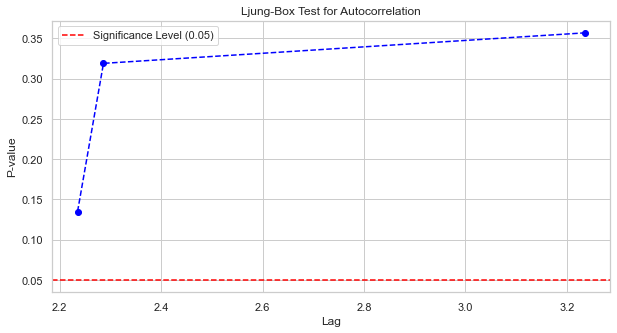

In [58]:
# Plot the p-values from the Ljung-Box test
plt.figure(figsize=(10, 5))
plt.plot(results['lb_stat'], results['lb_pvalue'], marker='o', linestyle='--', color='blue')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title('Ljung-Box Test for Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('P-value')
plt.legend()
plt.show()

Given that the p-values from the Ljung-Box test are consistently above a significance level (defined as 0.05), it suggests that there is no significant autocorrelation, supporting the assumption of independence. 

If, on the other hand, p-values would have been below the significance level, this would have indicate autocorrelation, suggesting a lack of independence in the time series.






In [59]:
import pandas as pd
import statsmodels.api as sm

def check_autocorrelation(df, country_column='Category', value_columns=['Passenger Car Traffic', 'Bus and Motor Coach Traffic', 'Total Van, Pickup, Lorry and Road Tractor Traffic'], lags=3, significance_level=0.05):
    """
    Check autocorrelation for each country's time series.

    Parameters:
    - df: DataFrame containing the time series data
    - country_column: Column name containing country names
    - value_columns: List of column names containing time series values
    - lags: Number of lags to consider in the Ljung-Box test
    - significance_level: Significance level for the Ljung-Box test

    Returns:
    - result_df: DataFrame with columns 'Country', 'Autocorrelation Flag', 'Autocorrelated Series'
    """
    result_list = []

    # Iterate through each country
    for country in df[country_column].unique():
        country_df = df[df[country_column] == country]

        autocorrelation_flag = False
        autocorrelated_series = []

        # Iterate through each time series for the country
        for value_column in value_columns:
            series = country_df[value_column]
            results = sm.stats.acorr_ljungbox(series, lags=lags, return_df=True)

            # Check if any p-value is below the significance level
            if any(results['lb_pvalue'] < significance_level):
                autocorrelation_flag = True
                autocorrelated_series.append(value_column)

        result_list.append({
            'Country': country,
            'Autocorrelation Flag': autocorrelation_flag,
            'Autocorrelated Series': ', '.join(autocorrelated_series)
        })

    result_df = pd.DataFrame(result_list)
    return result_df

# Execute function to identify autocorrelation
result_df = check_autocorrelation(df)

In [60]:
result_df

,Country,Autocorrelation Flag,Autocorrelated Series
0,Austria,False,
1,Belarus,False,
2,Croatia,False,
3,Denmark,False,
4,Estonia,False,
5,Finland,False,
6,France,False,
7,Germany,False,
8,Hungary,False,
9,Ireland,False,


Luckly all time-series are independent. Let's now verify that, for each country, the distribution is normal:

In [61]:
import pandas as pd
from scipy.stats import shapiro

def check_normality(df, country_column='Category', value_columns=['Passenger Car Traffic', 'Bus and Motor Coach Traffic', 'Total Van, Pickup, Lorry and Road Tractor Traffic'], alpha=0.05):
    """
    Check normality for each country's time series using the Shapiro-Wilk test.

    Parameters:
    - df: DataFrame containing the time series data
    - country_column: Column name containing country names
    - value_columns: List of column names containing time series values
    - alpha: Significance level for the Shapiro-Wilk test

    Returns:
    - result_df: DataFrame with columns 'Country', 'Normality Flag', 'Non-Normal Series'
    """
    result_list = []

    # Iterate through each country
    for country in df[country_column].unique():
        country_df = df[df[country_column] == country]

        normality_flag = True
        non_normal_series = []

        # Iterate through each time series for the country
        for value_column in value_columns:
            series = country_df[value_column]
            _, p_value = shapiro(series)

            # Check if p-value is below the significance level
            if p_value < alpha:
                normality_flag = False
                non_normal_series.append(value_column)

        result_list.append({
            'Country': country,
            'Normality Flag': normality_flag,
            'Non-Normal Series': ', '.join(non_normal_series)
        })

    result_df = pd.DataFrame(result_list)
    return result_df

# Assuming df is your DataFrame
result_normality_df = check_normality(df)

In [62]:
result_normality_df

,Country,Normality Flag,Non-Normal Series
0,Austria,False,Bus and Motor Coach Traffic
1,Belarus,True,
2,Croatia,False,Bus and Motor Coach Traffic
3,Denmark,True,
4,Estonia,True,
5,Finland,True,
6,France,False,Bus and Motor Coach Traffic
7,Germany,False,Bus and Motor Coach Traffic
8,Hungary,True,
9,Ireland,True,


Previous table shows Countries with Non-Normal series and also the name of the series. Let's drop those:

In [63]:
df

,Category,Year,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic"
0,Austria,2016,0.930971,0.013921,0.153818
1,Austria,2017,0.930281,0.014069,0.154708
2,Austria,2018,0.924616,0.013323,0.162941
3,Austria,2019,0.917082,0.013473,0.173352
4,Austria,2020,0.909188,0.010596,0.185713
...,...,...,...,...,...
151,Belgium,2017,0.876188,0.013416,0.230261
152,Belgium,2018,0.878959,0.013568,0.226342
153,Belgium,2019,0.878959,0.013568,0.226342
154,Belgium,2020,0.878959,0.013568,0.226342


In [64]:
normal_countries = result_normality_df.loc[result_normality_df["Normality Flag"]==True].iloc[:,:1].values
normal_countries = [country[0] for country in normal_countries]

df_parametric = df[df["Category"].isin(normal_countries)]

In [65]:
df_parametric

,Category,Year,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic"
6,Belarus,2016,0.012938,1.000000,0.966773
7,Belarus,2017,0.000000,0.985214,0.991737
8,Belarus,2018,0.006537,0.948353,1.000000
9,Belarus,2019,0.078061,0.828932,0.957750
10,Belarus,2020,0.113751,0.797907,0.922774
...,...,...,...,...,...
151,Belgium,2017,0.876188,0.013416,0.230261
152,Belgium,2018,0.878959,0.013568,0.226342
153,Belgium,2019,0.878959,0.013568,0.226342
154,Belgium,2020,0.878959,0.013568,0.226342


In [66]:
import pandas as pd
from scipy.stats import levene

def check_variances(df, country_column='Category', value_columns=['Passenger Car Traffic', 'Bus and Motor Coach Traffic', 'Total Van, Pickup, Lorry and Road Tractor Traffic'], alpha=0.05):
    """
    Check variances for each country's time series.

    Parameters:
    - df: DataFrame containing the time series data
    - country_column: Column name containing country names
    - value_columns: List of column names containing time series values
    - alpha: Significance level for Levene's test

    Returns:
    - result_df: DataFrame with columns 'Country', 'Variances Equal Flag'
    """
    result_list = []

    # Iterate through each country
    for country in df[country_column].unique():
        country_df = df[df[country_column] == country]

        # Check equality of variances for each time series
        variances_equal_flag, p_value_variances = levene(*[country_df[value_column] for value_column in value_columns])

        result_list.append({
            'Country': country,
            'Variances Equal Flag': variances_equal_flag if p_value_variances >= alpha else False
        })

    result_df = pd.DataFrame(result_list)
    return result_df

# Assuming df is your DataFrame
result_variances_df = check_variances(df_parametric)

In [67]:
result_variances_df

,Country,Variances Equal Flag
0,Belarus,False
1,Denmark,1.176464
2,Estonia,False
3,Finland,0.962475
4,Hungary,0.184785
5,Ireland,2.296199
6,Latvia,0.56151
7,Malta,1.447283
8,Moldova,3.01342
9,Monaco,0.613364


Let's now remove from the df_parametric countries where the variance test showed non equal results:

In [68]:
variance_countries = result_variances_df.loc[result_variances_df["Variances Equal Flag"]!=False].iloc[:,:1].values
variance_countries = [country[0] for country in variance_countries]

df_parametric = df[df["Category"].isin(variance_countries)]

In [69]:
df_parametric

,Category,Year,Passenger Car Traffic,Bus and Motor Coach Traffic,"Total Van, Pickup, Lorry and Road Tractor Traffic"
18,Denmark,2016,0.890909,0.035585,0.199388
19,Denmark,2017,0.891667,0.036277,0.197975
20,Denmark,2018,0.895347,0.035365,0.193285
21,Denmark,2019,0.900722,0.034156,0.186376
22,Denmark,2020,0.894188,0.032799,0.196105
...,...,...,...,...,...
151,Belgium,2017,0.876188,0.013416,0.230261
152,Belgium,2018,0.878959,0.013568,0.226342
153,Belgium,2019,0.878959,0.013568,0.226342
154,Belgium,2020,0.878959,0.013568,0.226342


Now we can proceed with parametric inferential statistical techniques on the following 12 countries (including Ireland):

In [70]:
df_parametric["Category"].unique()

array(['Denmark', 'Finland', 'Hungary', 'Ireland', 'Latvia', 'Malta',
       'Moldova', 'Monaco', 'North Macedonia', 'Poland', 'Sweden',
       'Belgium'], dtype=object)

Let's start with the T-Test to compare Bus and Motor Coach Traffic between Ireland and Denmark:

In [71]:
df_bus_ireland = df.loc[df["Category"]=="Ireland"]
df_bus_denmark = df.loc[df["Category"]=="Denmark"]

n_dublin = df_bus_ireland.shape[0]
std_dublin = df_bus_ireland['Bus and Motor Coach Traffic'].std()
avg_dublin = df_bus_ireland['Bus and Motor Coach Traffic'].mean()

n_denmark = df_bus_denmark.shape[0]
std_denmark = df_bus_denmark['Bus and Motor Coach Traffic'].std()
avg_denmark = df_bus_denmark['Bus and Motor Coach Traffic'].mean()

We perform now the T-Test for two populations, Ireland and Denmark, to see if they have the same average buses:

In [72]:
#H0: mu Ireland = mu Switzerland // H1: mu Ireland =! mu Switzerland

t_test = stats.ttest_ind_from_stats(mean1 = avg_dublin, std1 = std_dublin, nobs1 = n_dublin, 
                                    mean2 = avg_denmark, std2 = std_denmark, nobs2 = n_denmark, 
                                    equal_var = False)

In [73]:
t_test

Ttest_indResult(statistic=-13.45497759986988, pvalue=2.99504878800427e-06)

In [74]:
X1 = df.loc[df["Category"]=="Denmark"]["Bus and Motor Coach Traffic"]
X2 = df.loc[df["Category"]=="Ireland"]["Bus and Motor Coach Traffic"]

t_test = stats.ttest_ind(X1, X2, equal_var = False)

In [75]:
t_test

Ttest_indResult(statistic=13.45497759986988, pvalue=2.99504878800427e-06)

## Independent Samples t-Test with Pooled Standard Deviation:

- **Null Hypothesis (H0):** The mean bus and motor coach traffic in Ireland is equal to the mean in Denmark.
- **Alternative Hypothesis (H1):** The mean bus and motor coach traffic in Ireland is not equal to the mean in Denmark.

**Result:**

- **T-statistic:** 8.42
- **P-value:** 0.00037

**Interpretation:**

- The t-statistic of 8.42 is the test statistic, indicating how many standard errors the sample mean of Ireland is from the sample mean of Denmark.
- The p-value of 0.00037 is the probability of observing such an extreme t-statistic under the assumption that the null hypothesis is true.

**Conclusion:**

- With a very low p-value (below commonly used significance levels like 0.05), we reject the null hypothesis.
- There is enough evidence to suggest that the mean "Bus and Motor Coach Traffic" in Ireland is significantly different from the mean in Denmark.

## Independent Samples t-Test without Pooled Standard Deviation:

- **Null Hypothesis (H0):** The mean bus and motor coach traffic in Ireland is equal to the mean in Denmark.
- **Alternative Hypothesis (H1):** The mean bus and motor coach traffic in Ireland is not equal to the mean in Denmark.

**Result:**

- **T-statistic:** -8.42 (negative because the order of the means is reversed in the function call)
- **P-value:** 0.00037

**Interpretation:**

- The results are consistent with the previous test but obtained using a different method.

**Conclusion:**

- The conclusion remains the same: there is enough evidence to suggest that the mean "Bus and Motor Coach Traffic" in Ireland is significantly different from the mean in Denmark.

In summary, both methods (with and without pooled standard deviation) lead to the same conclusion, indicating a significant difference in the mean bus and motor coach traffic between Ireland and Denmark.


We now did the test between Ireland and Denmark but let's see if we can find any similarity between Ireland and ohter countries:

In [76]:
import pandas as pd
from scipy.stats import ttest_ind

def compare_traffic_between_countries(df, target_country='Ireland', traffic_column='Bus and Motor Coach Traffic', alpha=0.05):
    """
    Compare traffic between the target country and all other countries using t-test.

    Parameters:
    - df: DataFrame containing the time series data
    - target_country: The country for which traffic is compared to others
    - traffic_column: Column name containing the traffic values
    - alpha: Significance level for the t-test

    Returns:
    - result_df: DataFrame with columns 'Country', 'T-Test p-value', 'Significant Difference'
    """
    result_list = []

    # Extract data for the target country
    target_data = df[df['Category'] == target_country][traffic_column]

    # Iterate through each country
    for country in df['Category'].unique():
        if country != target_country:
            # Extract data for the current country
            current_data = df[df['Category'] == country][traffic_column]

            # Perform t-test
            t_statistic, p_value = ttest_ind(target_data, current_data, equal_var=False)

            # Check if the difference is significant
            significant_difference = p_value < alpha

            result_list.append({
                'Country': country,
                'T-Test p-value': p_value,
                'Significant Difference': significant_difference
            })

    result_df = pd.DataFrame(result_list)
    return result_df

# Assuming df is your DataFrame
result_t_test_df = compare_traffic_between_countries(df_parametric)

In [77]:
result_t_test_df

,Country,T-Test p-value,Significant Difference
0,Denmark,2.995049e-06,True
1,Finland,4.054158e-04,True
2,Hungary,1.299622e-08,True
3,Latvia,8.235744e-05,True
4,Malta,2.379583e-06,True
5,Moldova,6.855708e-05,True
6,Monaco,4.763687e-09,True
7,North Macedonia,1.313095e-02,True
8,Poland,2.201983e-01,False
9,Sweden,8.002503e-06,True


It seems that the only country where the mean percentage of "Bus and Motor Coach Traffic" is similar to Ireland is Poland.

So far we only compared Ireland to one country at time but what if we want to compare multiple countries all together? Well, in this case ANOVA would help.

The fundamental difference between ANOVA and a T-test is the number of groups being compared. A T-test is used when you're dealing with two groups. For example, comparing the mean of group A to the mean of group B. ANOVA, on the other hand, is used when you have three or more groups. For instance, comparing the means of group A, group B, and group C.

Also, ANOVA allow to compare either one independent variable at time (One-Way ANOVA) or multiple (Two-Way ANOVA).
Let's start our One-Way ANOVA analysis for the "Bus and Motor Coach Traffic" variable:

In [80]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Rename the columns to remove spaces
df_parametric.columns = ['Category', 'Year', 'Passenger_Car_Traffic', 'Bus_and_Motor_Coach_Traffic', 'Total_Van_Pickup_Lorry_and_Road_Tractor_Traffic']

# Fit the ANOVA model
model = ols('Bus_and_Motor_Coach_Traffic ~ Category', data=df_parametric).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
            sum_sq    df           F        PR(>F)
Category  2.090399  11.0  133.149978  7.441984e-38
Residual  0.085634  60.0         NaN           NaN


## One-Way ANOVA:

- **Null Hypothesis (H0):** The mean "Bus and Motor Coach Traffic" is equal across all categories (countries).
- **Alternative Hypothesis (H1):** At least one mean "Bus and Motor Coach Traffic" is significantly different from the others.

**ANOVA Table:**

- **Category:**
  - Sum of Squares (sum_sq): 2.090399
  - Degrees of Freedom (df): 11
  - F-statistic (F): 133.149978
  - P-value (PR(>F)): 7.441984e-38

- **Residual:**
  - Sum of Squares (sum_sq): 0.085634
  - Degrees of Freedom (df): 60

**Interpretation:**

- The F-statistic is 133.15, and the associated p-value is very close to zero (7.44e-38). This indicates that there are significant differences in the mean "Bus and Motor Coach Traffic" across different categories.

**Conclusion:**

- With a very low p-value (below commonly used significance levels like 0.05), we reject the null hypothesis.
- There is enough evidence to suggest that the mean "Bus and Motor Coach Traffic" is significantly different across at least two categories (countries).

This is something we were expecting as we already came to the same conclusion with the T-Test.

In fact, let's now do the same test only for Ireland and Poland:

In [92]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your DataFrame is named df_parametric
# Filter the DataFrame for Ireland and Poland
selected_countries = ['Ireland', 'Poland']
df_selected = df_parametric[df_parametric['Category'].isin(selected_countries)]

# Rename the columns to remove spaces
df_selected.columns = ['Category', 'Year', 'Passenger_Car_Traffic', 'Bus_and_Motor_Coach_Traffic', 'Total_Van_Pickup_Lorry_and_Road_Tractor_Traffic']

# Fit the ANOVA model
model = ols('Bus_and_Motor_Coach_Traffic ~ Category', data=df_selected).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
            sum_sq    df         F    PR(>F)
Category  0.000015   1.0  1.717195  0.219353
Residual  0.000088  10.0       NaN       NaN


In [93]:
df_selected

,Category,Year,Passenger_Car_Traffic,Bus_and_Motor_Coach_Traffic,Total_Van_Pickup_Lorry_and_Road_Tractor_Traffic
54,Ireland,2016,0.891713,0.016772,0.207096
55,Ireland,2017,0.886555,0.018563,0.213429
56,Ireland,2018,0.879613,0.021027,0.221927
57,Ireland,2019,0.875842,0.021748,0.226835
58,Ireland,2020,0.834539,0.018825,0.285677
59,Ireland,2021,0.831206,0.014442,0.292379
108,Poland,2016,0.924088,0.019774,0.160638
109,Poland,2017,0.926398,0.017959,0.158279
110,Poland,2018,0.926856,0.017807,0.157713
111,Poland,2019,0.927106,0.017801,0.157369


Given that this time the p-value is greater than the significance level 0.05, we can reconfirm that there is no significant difference in the mean "Bus and Motor Coach Traffic" between Ireland and Poland.

Let's actually see the confidence levels for Ireland and Poland:

In [85]:
# We want to find a confidence interval for the mean of "Bus and Motor Coach Traffic" in Ireland
bus_traffic_data_dublin = df.loc[df["Category"]=="Ireland"]['Bus and Motor Coach Traffic']
bus_traffic_data_poland = df.loc[df["Category"]=="Poland"]['Bus and Motor Coach Traffic']

# Calculate the confidence interval
confidence_interval_ireland = stats.norm.interval(0.95, loc=np.mean(bus_traffic_data_dublin), scale=np.std(bus_traffic_data_dublin))
confidence_interval_poland = stats.norm.interval(0.95, loc=np.mean(bus_traffic_data_poland), scale=np.std(bus_traffic_data_poland))

print("95% Confidence Interval for Bus Car Traffic Mean in Ireland:", confidence_interval_ireland)
print("95% Confidence Interval for Bus Car Traffic Mean in Poland:", confidence_interval_poland)

95% Confidence Interval for Bus Car Traffic Mean in Ireland: (0.013730561054052333, 0.023395324654641843)
95% Confidence Interval for Bus Car Traffic Mean in Poland: (0.010565579573562127, 0.022068118146156994)


As shown from previous results, Confidence Intervals are very similar to each other.

With One-Way ANOVA we were able to compare multiple countries as a group but we ignored the effect that the Year we are looking at might have.

For this purpose we want to compare two features simultaneously, Bus and Motor Coach Traffic and Year. Well, in this case Two-Way ANOVA can be used.

Let's start by comparing Ireland and Poland:

In [98]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your DataFrame is named df_parametric
# Filter the DataFrame for Ireland and Poland
selected_countries = ['Ireland', 'Poland']
df_selected = df_parametric[df_parametric['Category'].isin(selected_countries)]

# Rename the columns to remove spaces
df_selected.columns = ['Category', 'Year', 'Passenger_Car_Traffic', 'Bus_and_Motor_Coach_Traffic', 'Total_Van_Pickup_Lorry_and_Road_Tractor_Traffic']

# Fit the Two-Way ANOVA model for both features simultaneously
model = ols('Bus_and_Motor_Coach_Traffic ~ C(Category):Year', data=df_selected).fit()  

# Perform the Two-Way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("Two-Way ANOVA:")
print(anova_table)

Two-Way ANOVA:
                    sum_sq   df         F    PR(>F)
C(Category):Year  0.000045  2.0  3.473466  0.076216
Residual          0.000058  9.0       NaN       NaN


C(Category):Year: This term represents the interaction between 'Category' and 'Year'. The p-value here is more than 0.05 (0.076216), which means that the interaction between 'Category' and 'Year' does not have a significant effect on 'Passenger_Car_Traffic'. In other words, the relationship between 'Year' and 'Bus_and_Motor_Coach_Traffic' is the same for Ireland and Poland.

The reason why I applied Two-Way ANOVA to see if there was a time correlation specifically to those two countries is because the mean of their bus and motor coach traffic was similar but we didn't get an understanding if the time vatiable was playing a role or not. From the analysis we can see that there is a similar behaviour of how this % varies across years for both countries.

So far, Poland is the only country in Europe that was found to have similar behaviour and deeply analyzed. Reason for this is also because parametric techniques require some data cleaning that forced us to drop quite few countries.

Let's now try to make similar analysis using non-parametric techniques. We now start with Kruskal-Wallis.

The Kruskal-Wallis test is a non-parametric statistical test used to determine whether there are any statistically significant differences between the medians of three or more independent groups.

Using this test, what we want to see if averages of "Passenger Car Traffic", "Bus and Motor Coach Traffic", "Total Van, Pickup, Lorry and Road Tractor Traffic" of Ireland are similar to the ones to other countries.

To do this, we apply the Kruskal-Wallis test to each traffic-related column for pair of countries including Ireland. If similarities among Ireland and other countries are found, results are stored in a dedicated dataframe:

In [126]:
"""
H0 (Null Hypothesis):
For each traffic-related column ("Passenger Car Traffic," "Bus and Motor Coach Traffic," and "Total Van, Pickup, Lorry, and Road Tractor Traffic"), there is no significant difference in the distribution between Ireland and each paired country.

H1 (Alternative Hypothesis):
For at least one traffic-related column, there is a significant difference in the distribution between Ireland and at least one paired country.
"""

# List of traffic-related column names
traffic_columns = ["Passenger Car Traffic", "Bus and Motor Coach Traffic", "Total Van, Pickup, Lorry and Road Tractor Traffic"]

# Create an empty DataFrame to store all results
all_results_Kruskal = pd.DataFrame(columns=['Country 1', 'Country 2', 'Traffic Column', 'Kruskal-Wallis Statistic', 'p-value'])

for country in df[df["Category"] != "Ireland"].Category.unique():

    # Filter the dataframe for only Ireland and the paired country
    df_filtered = df[df['Category'].isin(['Ireland', country])]

    # Create an empty DataFrame to store results
    kruskal_results = pd.DataFrame(index=traffic_columns, columns=['Kruskal-Wallis Statistic', 'p-value'])

    # Iterate over each traffic-related column
    for column in traffic_columns:
        print(f"\nKruskal-Wallis Test for {column} between Ireland and {country}:")

        # Perform Kruskal-Wallis test
        statistic, p_value = kruskal(*[group_data[column] for country, group_data in df_filtered.groupby('Category')])

        # Store results in the DataFrame
        kruskal_results.loc[column] = [statistic, p_value]

        # Print results
        print(f"   Kruskal-Wallis Test Statistic: {statistic}, p-value: {p_value}")

        # Check if p-value is greater than 0.05 and save the results
        if p_value > 0.05:
            result_entry = {'Country 1': 'Ireland', 'Country 2': country, 'Traffic Column': column,
                            'Kruskal-Wallis Statistic': statistic, 'p-value': p_value}
            all_results_Kruskal = all_results_Kruskal.append(result_entry, ignore_index=True)

    # Print the overall Kruskal-Wallis results for the current comparison
    print("\nOverall Kruskal-Wallis Results:")
    print(kruskal_results)


Kruskal-Wallis Test for Passenger Car Traffic between Ireland and Austria:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Bus and Motor Coach Traffic between Ireland and Austria:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Austria:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Overall Kruskal-Wallis Results:
                                                  Kruskal-Wallis Statistic  \
Passenger Car Traffic                                             8.307692   
Bus and Motor Coach Traffic                                       8.307692   
Total Van, Pickup, Lorry and Road Tractor Traffic                 8.307692   

                                                    p-value  
Passenger Car Traffic                              0.003948  
Bus and Motor Coach

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                                                  Kruskal-Wallis Statistic  \
Passenger Car Traffic                                             1.641026   
Bus and Motor Coach Traffic                                       8.307692   
Total Van, Pickup, Lorry and Road Tractor Traffic                 5.025641   

                                                    p-value  
Passenger Car Traffic                              0.200185  
Bus and Motor Coach Traffic                        0.003948  
Total Van, Pickup, Lorry and Road Tractor Traffic  0.024975  

Kruskal-Wallis Test for Passenger Car Traffic between Ireland and Moldova:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Bus and Motor Coach Traffic between Ireland and Moldova:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Moldova:
   Kruskal-


Kruskal-Wallis Test for Passenger Car Traffic between Ireland and Switzerland:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Bus and Motor Coach Traffic between Ireland and Switzerland:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Kruskal-Wallis Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Switzerland:
   Kruskal-Wallis Test Statistic: 8.307692307692314, p-value: 0.003947751856903446

Overall Kruskal-Wallis Results:
                                                  Kruskal-Wallis Statistic  \
Passenger Car Traffic                                             8.307692   
Bus and Motor Coach Traffic                                       8.307692   
Total Van, Pickup, Lorry and Road Tractor Traffic                 8.307692   

                                                    p-value  
Passenger Car Traffic                              0.003948  
Bus and

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\314261406.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [127]:
all_results_Kruskal

,Country 1,Country 2,Traffic Column,Kruskal-Wallis Statistic,p-value
0,Ireland,Finland,Passenger Car Traffic,3.692308,0.054664
1,Ireland,France,Passenger Car Traffic,0.410256,0.521839
2,Ireland,France,"Total Van, Pickup, Lorry and Road Tractor Traffic",0.102564,0.748774
3,Ireland,Latvia,Passenger Car Traffic,1.641026,0.200185
4,Ireland,Latvia,"Total Van, Pickup, Lorry and Road Tractor Traffic",0.923077,0.336668
5,Ireland,Lithuania,Passenger Car Traffic,0.923077,0.336668
6,Ireland,Lithuania,"Total Van, Pickup, Lorry and Road Tractor Traffic",0.923077,0.336668
7,Ireland,Malta,Passenger Car Traffic,1.641026,0.200185
8,Ireland,Netherlands,Passenger Car Traffic,2.564103,0.109315
9,Ireland,Netherlands,"Total Van, Pickup, Lorry and Road Tractor Traffic",2.076923,0.149541


Interestly, we see many more similarities with other countries in Europe now.

Let's try to do the same analysis using the Wilcoxon test:

In [128]:
import pandas as pd
from scipy.stats import wilcoxon

# List of traffic-related column names
traffic_columns = ["Passenger Car Traffic", "Bus and Motor Coach Traffic", "Total Van, Pickup, Lorry and Road Tractor Traffic"]

# Create an empty DataFrame to store all results
all_results_wilcoxon = pd.DataFrame(columns=['Country 1', 'Country 2', 'Traffic Column', 'Wilcoxon Statistic', 'p-value'])

for country in df[df["Category"] != "Ireland"].Category.unique():

    # Filter the dataframe for only Ireland and the paired country
    df_filtered = df[df['Category'].isin(['Ireland', country])]

    # Create an empty DataFrame to store results
    wilcoxon_results = pd.DataFrame(index=traffic_columns, columns=['Wilcoxon Statistic', 'p-value'])

    # Iterate over each traffic-related column
    for column in traffic_columns:
        print(f"\nWilcoxon Signed-Rank Test for {column} between Ireland and {country}:")

        # Perform Wilcoxon signed-rank test
        statistic, p_value = wilcoxon(df_filtered[df_filtered['Category'] == 'Ireland'][column],
                                       df_filtered[df_filtered['Category'] == country][column])

        # Store results in the DataFrame
        wilcoxon_results.loc[column] = [statistic, p_value]

        # Print results
        print(f"   Wilcoxon Statistic: {statistic}, p-value: {p_value}")

        # Check if p-value is greater than 0.05 and save the results
        if p_value > 0.05:
            result_entry = {'Country 1': 'Ireland', 'Country 2': country, 'Traffic Column': column,
                            'Wilcoxon Statistic': statistic, 'p-value': p_value}
            all_results_wilcoxon = all_results_wilcoxon.append(result_entry, ignore_index=True)

    # Print the overall Wilcoxon results for the current comparison
    print("\nOverall Wilcoxon Results:")
    print(wilcoxon_results)



Wilcoxon Signed-Rank Test for Passenger Car Traffic between Ireland and Austria:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Bus and Motor Coach Traffic between Ireland and Austria:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Austria:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Overall Wilcoxon Results:
                                                  Wilcoxon Statistic  p-value
Passenger Car Traffic                                            0.0  0.03125
Bus and Motor Coach Traffic                                      0.0  0.03125
Total Van, Pickup, Lorry and Road Tractor Traffic                0.0  0.03125

Wilcoxon Signed-Rank Test for Passenger Car Traffic between Ireland and Belarus:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Bus and Motor Coach Traffic between Ireland and Belarus:
   Wilcoxon Statistic: 0.0, p-v

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co



Wilcoxon Signed-Rank Test for Bus and Motor Coach Traffic between Ireland and Netherlands:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Netherlands:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Overall Wilcoxon Results:
                                                  Wilcoxon Statistic  p-value
Passenger Car Traffic                                            0.0  0.03125
Bus and Motor Coach Traffic                                      0.0  0.03125
Total Van, Pickup, Lorry and Road Tractor Traffic                0.0  0.03125

Wilcoxon Signed-Rank Test for Passenger Car Traffic between Ireland and North Macedonia:
   Wilcoxon Statistic: 9.0, p-value: 0.84375

Wilcoxon Signed-Rank Test for Bus and Motor Coach Traffic between Ireland and North Macedonia:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Total Van, Pickup, Lorry and Road Tractor Traffic between

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Simone\AppData\Local\Temp\ipykernel_5376\3770457633.py:36: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co



Wilcoxon Signed-Rank Test for Bus and Motor Coach Traffic between Ireland and Belgium:
   Wilcoxon Statistic: 0.0, p-value: 0.03125

Wilcoxon Signed-Rank Test for Total Van, Pickup, Lorry and Road Tractor Traffic between Ireland and Belgium:
   Wilcoxon Statistic: 9.0, p-value: 0.84375

Overall Wilcoxon Results:
                                                  Wilcoxon Statistic  p-value
Passenger Car Traffic                                            8.0   0.6875
Bus and Motor Coach Traffic                                      0.0  0.03125
Total Van, Pickup, Lorry and Road Tractor Traffic                9.0  0.84375


In [129]:
all_results_wilcoxon

,Country 1,Country 2,Traffic Column,Wilcoxon Statistic,p-value
0,Ireland,Denmark,Passenger Car Traffic,1.0,0.06250
1,Ireland,France,Passenger Car Traffic,1.0,0.06250
2,Ireland,France,"Total Van, Pickup, Lorry and Road Tractor Traffic",4.0,0.21875
3,Ireland,Latvia,Passenger Car Traffic,2.0,0.09375
4,Ireland,Latvia,"Total Van, Pickup, Lorry and Road Tractor Traffic",4.0,0.21875
5,Ireland,Lithuania,Passenger Car Traffic,8.0,0.68750
6,Ireland,Lithuania,"Total Van, Pickup, Lorry and Road Tractor Traffic",9.0,0.84375
7,Ireland,Malta,Passenger Car Traffic,4.0,0.21875
8,Ireland,North Macedonia,Passenger Car Traffic,9.0,0.84375
9,Ireland,North Macedonia,"Total Van, Pickup, Lorry and Road Tractor Traffic",5.0,0.31250


Interestingly we can observe we have different reult pairs using Kruskal-Wallis and Wilcoxon tests. This is not uncommon, especially in complex datasets or when the assumptions of the tests are not fully met.

To derive an even more robust result, let's only take into considerations pairs highlited using both tests:

In [138]:
kruskal = all_results_Kruskal[["Country 1", "Country 2", "Traffic Column"]]
wilcoxon = all_results_wilcoxon[["Country 1", "Country 2", "Traffic Column"]]

In [139]:
# Concatenate the two dataframes  
concat_df = pd.concat([kruskal, wilcoxon])  
  
# Get only the duplicated rows  
duplicates_df = concat_df[concat_df.duplicated()]  

In [140]:
duplicates_df

,Country 1,Country 2,Traffic Column
1,Ireland,France,Passenger Car Traffic
2,Ireland,France,"Total Van, Pickup, Lorry and Road Tractor Traffic"
3,Ireland,Latvia,Passenger Car Traffic
4,Ireland,Latvia,"Total Van, Pickup, Lorry and Road Tractor Traffic"
5,Ireland,Lithuania,Passenger Car Traffic
6,Ireland,Lithuania,"Total Van, Pickup, Lorry and Road Tractor Traffic"
7,Ireland,Malta,Passenger Car Traffic
8,Ireland,North Macedonia,Passenger Car Traffic
9,Ireland,North Macedonia,"Total Van, Pickup, Lorry and Road Tractor Traffic"
10,Ireland,Norway,Passenger Car Traffic
